In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from config import gkey
import gmaps
from ipywidgets.embed import embed_minimal_html
import seaborn as sns
import plotly.express as px
import re
import gmaps.geojson_geometries
from matplotlib.cm import viridis
from matplotlib.cm import Spectral
from matplotlib.colors import to_hex
import country_converter as coco

# Data Pull

In [2]:
ultimate_no_null_df = pd.read_csv("ultimate_no_null.csv")
ultimate_no_null_df.head()

standard_names  month  year  Confirmed  stringency_index       lat  \
0    Afghanistan      1  2020        0.0          0.000000  33.93911   
1    Afghanistan      2  2020        1.0          2.010690  33.93911   
2    Afghanistan      3  2020      174.0         40.831935  33.93911   
3    Afghanistan      4  2020     1952.0         80.740000  33.93911   
4    Afghanistan      5  2020    13081.0         84.260000  33.93911   

         lng  Population (2020)  Density (P/Km²) Infection_rate ISO_2 ISO_3  \
0  67.709953           39074280               60        0.0000%    AF   AFG   
1  67.709953           39074280               60        0.0000%    AF   AFG   
2  67.709953           39074280               60        0.0004%    AF   AFG   
3  67.709953           39074280               60        0.0050%    AF   AFG   
4  67.709953           39074280               60        0.0335%    AF   AFG   

   Infection_rate_f  
0            0.0000  
1            0.0000  
2            0.0004  
3            0.0050  
4            0.0335

In [71]:
# test_df.to_csv("test_df.csv")

In [3]:
test_df =  pd.read_csv("test_df.csv")
test_df.head()

standard_names ISO_2 ISO_3  Population (2020)  Density (P/Km²)  month  \
0    Afghanistan    AF   AFG           39074280               60      6   
1        Albania    AL   ALB            2877239              105     11   
2        Algeria    DZ   DZA           43984569               18     11   
3        Andorra    AD   AND              77287              164     10   
4         Angola    AO   AGO           33032075               26     10   

   Confirmed  Infection_rate_f  total_inf_rate  stringency_hike_1Q  
0    16299.0            0.0417          0.1183           40.831935  
1    17307.0            0.6015          1.8074           58.570968  
2    25257.0            0.0574          0.2146           37.486129  
3     2706.0            3.5012          9.7286           21.624839  
4     5833.0            0.0177          0.0502           24.400000

In [4]:
covid_stats_df =  pd.read_csv("covid_stats_2020.csv")
covid_stats_df.head()

standard_names ISO_2 ISO_3  Population (2020)        lat        lng  \
0    Afghanistan    AF   AFG           39074280  33.939110  67.709953   
1        Albania    AL   ALB            2877239  41.153332  20.168331   
2        Algeria    DZ   DZA           43984569  28.033886   1.659626   
3        Andorra    AD   AND              77287  42.506285   1.521801   
4         Angola    AO   AGO           33032075 -11.202692  17.873887   

   Density (P/Km²)  Confirmed  stringency_index  Infection_rate_f  
0               60    46274.0         42.700514            0.1183  
1              105    52004.0         55.330056            1.8074  
2               18    94371.0         59.981444            0.2146  
3              164     7519.0         40.286864            9.7286  
4               26    16562.0         57.541104            0.0502

In [5]:
sample = pd.read_csv("samples.csv")
sample

standard_names ISO_2 ISO_3  Population (2020)        lat         lng  \
0       United States    US   USA          331341050  37.090240  -95.712891   
1               India    IN   IND         1382345085  20.593684   78.962880   
2              Brazil    BR   BRA          212821986 -14.235004  -51.925280   
3               China    CN   CHN         1440297825  35.861660  104.195397   
4              France    FR   FRA           65298930  46.227638    2.213749   
5              Russia    RU   RUS          145945524  61.524010  105.318756   
6               Spain    ES   ESP           46757980  40.463667   -3.749220   
7      United Kingdom    GB   GBR           67948282  55.378051   -3.435973   
8               Italy    IT   ITA           60446035  41.871940   12.567380   
9              Turkey    TR   TUR           84495243  38.963745   35.243322   
10            Ireland    IE   IRL            4947267  53.142367   -7.692054   
11            Nigeria    NG   NGA          206984347   9.081999    8.675277   
12         Uzbekistan    UZ   UZB           33551824  41.377491   64.585262   
13           Malaysia    MY   MYS           32436963   4.210484  101.975766   
14          Singapore    SG   SGP            5858322   1.352083  103.819836   
15              Ghana    GH   GHA           31181428   7.946527   -1.023194   
16            Albania    AL   ALB            2877239  41.153332   20.168331   
17         Luxembourg    LU   LUX             627704  49.815273    6.129583   
18        South Korea    KR   KOR           51276977  35.907757  127.766922   
19            Finland    FI   FIN            5542237  61.924110   25.748151   
20           Barbados    BB   BRB             287437  13.193887  -59.543198   
21         Seychelles    SC   SYC              98453  -4.679574   55.491977   
22             Monaco    MC   MCO              39290  43.738418    7.424616   
23  Brunei Darussalam    BN   BRN             438202   4.535277  114.727669   
24           Dominica    DM   DMA              72017  15.414999  -61.370976   
25               Fiji    FJ   FJI             897573 -17.713371  178.065032   
26               Laos    LA   LAO            7293542  19.856270  102.495496   
27        Timor-Leste    TL   TLS            1322667  -8.874217  125.727539   
28    Solomon Islands    SB   SLB             689671  -9.645710  160.156194   
29            Vanuatu    VU   VUT             308337 -15.376706  166.959158   

    Density (P/Km²)   Confirmed  stringency_index  Infection_rate_f  
0                36  17459296.0         56.045880            5.2692  
1               464   9462809.0         62.869497            0.6845  
2                25   7162978.0         56.761687            3.3657  
3               153   6665209.0         68.391841            0.4628  
4               119   5352449.0         55.223795            8.1966  
5                 9   2764843.0         50.600998            1.8944  
6                94   2246032.0         55.975557            4.8034  
7               281   2173896.0         56.888553            3.1993  
8               206   2159937.0         58.364239            3.5734  
9               110   1982090.0         53.585087            2.3457  
10               72     78254.0         56.331917            1.5817  
11              226     77013.0         53.885979            0.0372  
12               79     75675.0         50.968375            0.2255  
13               99     65697.0         52.726719            0.2026  
14             8358     58386.0         49.634418            0.9967  
15              137     53653.0         41.623758            0.1721  
16              105     52004.0         55.330056            1.8074  
17              242     51656.0         43.160278            8.2295  
18              527     48570.0         47.322044            0.0945  
19               18     47179.0         36.915609            0.8511  
20              668       307.0         45.059213            0.1069  
21              2

In [37]:
covid_stats_sorted_df = pd.read_csv("covid_stats_sorted.csv")
covid_stats_sorted_df.head(10)

standard_names ISO_2 ISO_3  Population (2020)        lat         lng  \
0   United States    US   USA          331341050  37.090240  -95.712891   
1           India    IN   IND         1382345085  20.593684   78.962880   
2          Brazil    BR   BRA          212821986 -14.235004  -51.925280   
3           China    CN   CHN         1440297825  35.861660  104.195397   
4          France    FR   FRA           65298930  46.227638    2.213749   
5          Russia    RU   RUS          145945524  61.524010  105.318756   
6           Spain    ES   ESP           46757980  40.463667   -3.749220   
7  United Kingdom    GB   GBR           67948282  55.378051   -3.435973   
8           Italy    IT   ITA           60446035  41.871940   12.567380   
9          Turkey    TR   TUR           84495243  38.963745   35.243322   

   Density (P/Km²)   Confirmed  stringency_index  Infection_rate_f  
0               36  17459296.0         56.045880            5.2692  
1              464   9462809.0         62.869497            0.6845  
2               25   7162978.0         56.761687            3.3657  
3              153   6665209.0         68.391841            0.4628  
4              119   5352449.0         55.223795            8.1966  
5                9   2764843.0         50.600998            1.8944  
6               94   2246032.0         55.975557            4.8034  
7              281   2173896.0         56.888553            3.1993  
8              206   2159937.0         58.364239            3.5734  
9              110   1982090.0         53.585087            2.3457

# Heatmap by gmaps

In [8]:
# Configure gmaps
gmaps.configure(api_key=gkey)

# Store latitude and longitude in locations
locations = covid_stats_df[["lat", "lng"]]

# Store Confirmed in Confirmed series
confirmed = covid_stats_df["Confirmed"].astype(float)

# Calculating the max Confirmed for heatmap
max_infection = confirmed.max()

In [9]:
# Plot Heatmap
fig = gmaps.figure()

info_box_template = """
<dl>
<dt>Name</dt><dd>{standard_names}</dd>
<dt>Confirmed</dt><dd>{Confirmed}</dd>
<dt>Population</dt><dd>{Population (2020)}</dd>
<dt>Infection rate</dt><dd>{Infection_rate_f}</dd>
</dl>
"""
sample_info = [info_box_template.format(**row) for index, row in sample.iterrows()]
sample_locations = sample[["lat", "lng"]]
markers = gmaps.marker_layer(sample_locations, info_box_content = sample_info)

# Create heat layer
heatmap_layer = gmaps.heatmap_layer(locations, weights=confirmed, max_intensity=1000000,
                                    point_radius=5.0, dissipating = False)

# Add layer
fig.add_layer(heatmap_layer)
fig.add_layer(markers)
# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [7]:
# Export the map in an interactive HTML file
# embed_minimal_html("Images/Confirmed.html", views=[fig])

# Plotly world map

In [8]:
# fig = px.colors.sequential.swatches_continuous()
# fig.show()

In [10]:
fig = px.choropleth(covid_stats_df[["standard_names", "ISO_3", "Confirmed"]], locations="ISO_3",
                    color="Confirmed", 
                    hover_name="standard_names", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Rainbow)
fig.write_html("covid_world.html")
fig.show()

# GeoJSON layer

In [11]:
covid_dict = covid_stats_df[["standard_names", "Confirmed"]].set_index('standard_names').to_dict('dict')
countries_geojson = gmaps.geojson_geometries.load_geometry('countries')

min_con = min(covid_dict["Confirmed"].keys(), key=(lambda k: covid_dict["Confirmed"][k]))
max_con = max(covid_dict["Confirmed"].keys(), key=(lambda k: covid_dict["Confirmed"][k]))
con_range = covid_dict["Confirmed"][max_con] - covid_dict["Confirmed"][min_con]

def calculate_color(con):
    """
    Convert the confirmed count to a color
    """
    # make gini a number between 0 and 1
    normalized_con = (con - covid_dict["Confirmed"][min_con]) / con_range

    # invert gini so that high inequality gives dark color
    inverse_con = 1.0 - normalized_con

    # transform the gini coefficient to a matplotlib color
    mpl_color = Spectral(inverse_con)

    # transform from a matplotlib color to a valid CSS color
    gmaps_color = to_hex(mpl_color, keep_alpha=False)

    return gmaps_color

In [12]:
colors = []
for feature in countries_geojson['features']:
    country_name = coco.convert(names=feature['properties']['name'], to='name_short')
    try:
        con = covid_dict["Confirmed"][country_name]
        color = calculate_color(con)
    except KeyError:
        # no GINI for that country: return default color
        color = (0, 0, 0, 0.3)
    colors.append(color)

Baykonur Cosmodrome not found in regex
Siachen Glacier not found in regex


In [13]:
info_box_template = """
<dl>
<dt>Name</dt><dd>{standard_names}</dd>
<dt>Confirmed</dt><dd>{Confirmed}</dd>
<dt>Population</dt><dd>{Population (2020)}</dd>
<dt>Infection rate</dt><dd>{Infection_rate_f}</dd>
</dl>
"""
sample_info = [info_box_template.format(**row) for index, row in sample.iterrows()]
sample_locations = sample[["lat", "lng"]]
markers = gmaps.marker_layer(sample_locations, info_box_content = sample_info)

fig = gmaps.figure(layout={
        'border': '1px solid black'
})
borders = gmaps.geojson_layer(
    countries_geojson,
    fill_color=colors,
    stroke_color=colors,
    fill_opacity=0.8)
fig.add_layer(borders)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='420px'))

In [15]:
# Export the map in an interactive HTML file
embed_minimal_html("Confirmed_test.html", views=[fig])

# Horizontal Bar plot

In [15]:
# # Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# x_axis = np.arange(len(sample))
# tick_locations = [value for value in x_axis]

# plt.figure(figsize=(30,40))
# plt.bar(x_axis, sample["Confirmed"], color='blue', align="center", width = 0.52, zorder = 3)
# plt.xticks(tick_locations, list(sample["standard_names"]), rotation="vertical", fontsize= 16)

# # Set limits for x & y axes
# plt.xlim(-0.55, len(x_axis)-0.45)
# plt.ylim(0, max(sample["Confirmed"])*1.05)

# # Set labels for axes & title for the chart
# plt.title("Count of cases for each Country")
# plt.xlabel("Countries")
# plt.ylabel("Confirmed")

# # Creating and displaying legend
# column_name = ["Confirmed"]
# plt.legend(column_name,loc="best")
# plt.grid(zorder=0)

# # Display the plot
# # plt.savefig("Images/bar_chart.png")

# plt.show()

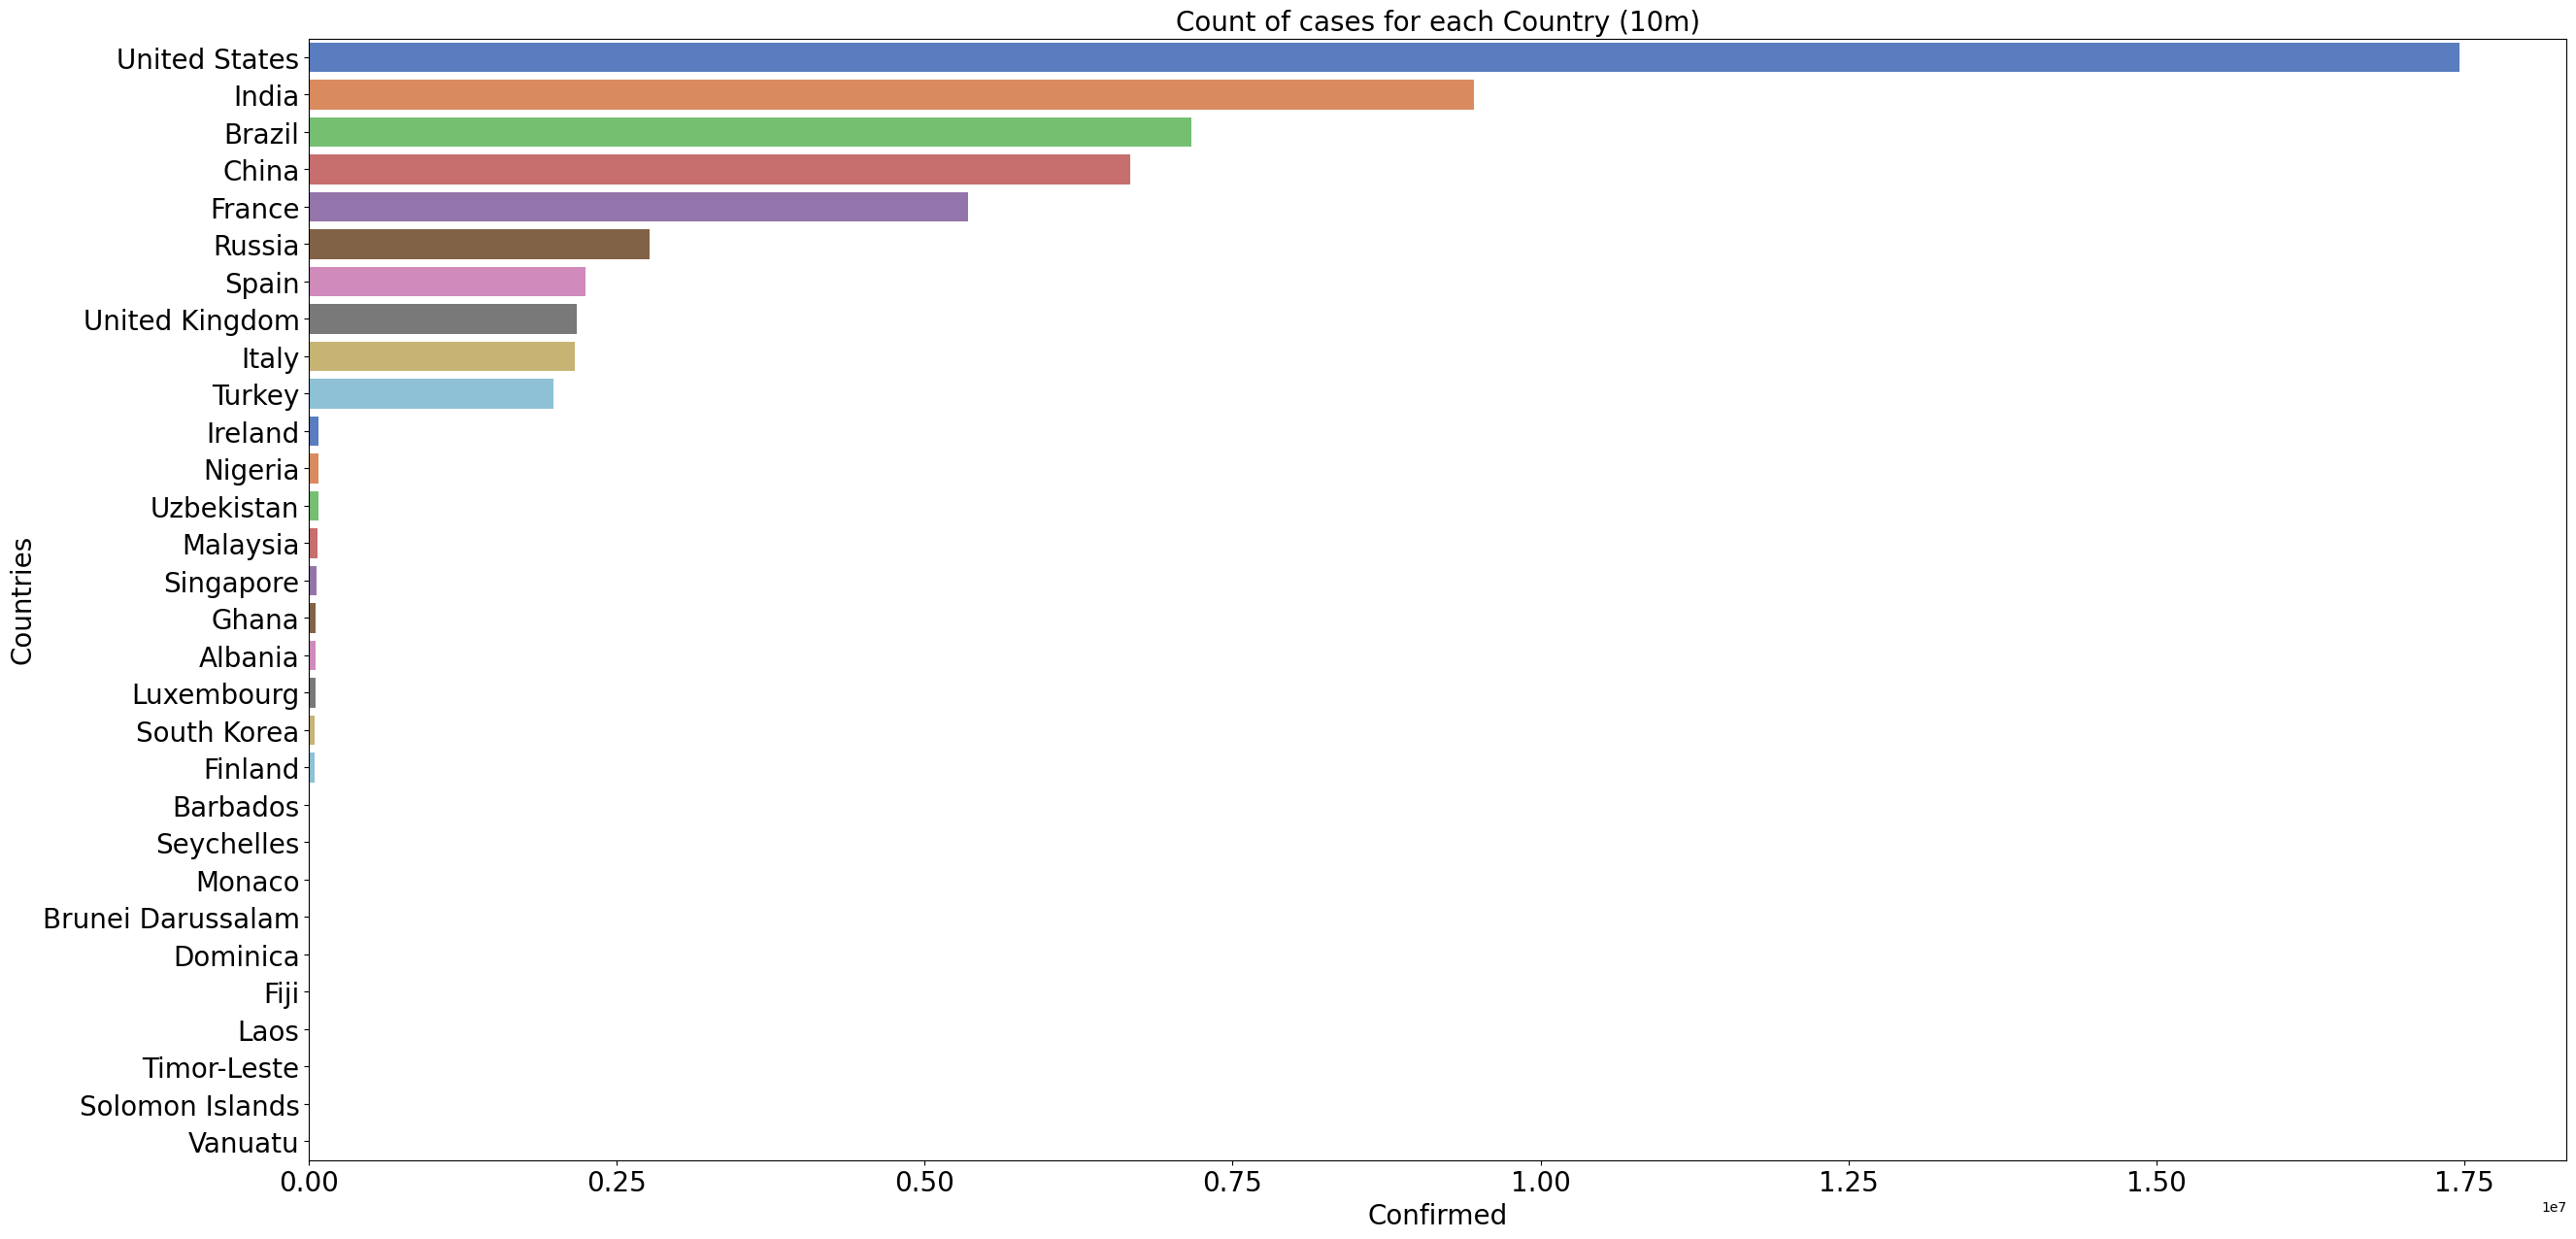

In [6]:
plt.rcdefaults()
plt.figure(figsize=(30,15))
ax = sns.barplot(x="Confirmed", y="standard_names", data=sample, palette = "muted")
ax.set_title('Count of cases for each Country (10m)', fontsize=20)
plt.xlabel('Confirmed', fontsize = 20)
plt.ylabel("Countries", fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Line plots and regressions

In [11]:
# Define function for calculating linear regression and scatter plot with linear regression plot
def linear_regression(x,y,country):
#     print(f"The correlation coefficient of {country} is : {np.nan_to_num(round(st.pearsonr(x, y)[0],4))}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    print(f"The correlation coefficient of {country} is : {rvalue}")
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, c = "lightblue", edgecolor = "black")
    plt.plot(x,regress_values,"r-")
    plt.title(f"{country}'s correlation value: {rvalue}")
    plt.ylabel("Infection Rate")
    plt.xlabel("Stringency Index")
    plt.grid(alpha = .2)
    return line_eq

# Define a fuction for annotating
def plot_annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="black")

In [28]:
def ln_rg_country(country):
    
    x = ultimate_no_null_df["stringency_index"].loc[ultimate_no_null_df["standard_names"] == country]
    y = ultimate_no_null_df["Infection_rate"].loc[ultimate_no_null_df["standard_names"] == country]\
            .str.rstrip('%').astype('float')
    a = x.min()
    b = y.max()
    line_eq = linear_regression(x,y, country)
    
    plot_annotate(line_eq, a, b)
    plt.savefig(f"Images/{country}_lin_reg_chart.png")
    plt.show()

In [29]:
def line_plots(country):    
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    num_rcd = len(ultimate_no_null_df.loc[ultimate_no_null_df["standard_names"] == country])
    x_axis= range(1,num_rcd+1)
    tick_locations = [value for value in x_axis]
    y1 = ultimate_no_null_df["Confirmed"].loc[ultimate_no_null_df["standard_names"] == country]
    y2 = ultimate_no_null_df["stringency_index"].loc[ultimate_no_null_df["standard_names"] == country]
    y3 = ultimate_no_null_df["Infection_rate"].loc[ultimate_no_null_df["standard_names"] == country]\
            .str.rstrip('%').astype('float')
#     plt.figure(1, figsize=(12,10))
#     plt.subplot(311)
#     plt.plot(x_axis, y1, color='orange', linewidth=2, markersize=12, label = "Confirmed")
#     plt.legend(loc='best')
#     plt.xlim(0,13)
#     plt.xlabel("2020")
#     plt.ylabel("Confirmed in millions")
#     plt.title(f"{country} Covid confirmed trend for 2020")
#     plt.xticks(tick_locations, months, rotation="vertical")
#     plt.grid()
#     plt.subplot(312)
#     plt.plot(x_axis, y2, color='blue', linewidth=2, markersize=12, label = "Stringency")
#     plt.legend(loc='best')
#     plt.xlim(0,13)
#     plt.ylim(0,100)
#     plt.xticks(tick_locations, months, rotation="vertical")
#     plt.xlabel("2020")
#     plt.ylabel("Stringency Index")
#     plt.title(f"{country} law stringency trend for 2020")
#     plt.grid()
#     plt.subplot(313)
#     plt.plot(x_axis, y3, color='red', linewidth=2, markersize=12, label = "Infection rate")
#     plt.legend(loc='best')
#     plt.xlim(0,13)
#     plt.xticks(tick_locations, months, rotation="vertical")
#     plt.xlabel("2020")
#     plt.ylabel("Infection rate")
#     plt.title(f"{country} infection rate for 2020")
#     plt.grid()

#     plt.tight_layout()
#     plt.show()
    max_count = y1.max()
    plt.rcdefaults()
    fig,ax1 = plt.subplots()
    plt.grid(alpha = .5, zorder = 0)
#     sns.set_palette("PuBuGn_d")
    data = ultimate_no_null_df.loc[ultimate_no_null_df["standard_names"] == country]
    ax1.set_xlabel("Month", fontsize =16)
    
#     ax1 = sns.lineplot(x= "month", y = "Confirmed", data = data , zorder = 3, palette='red')
    plt.plot(x_axis, y3, color='orange', linewidth=2, markersize=12, label = "Infection rate")
    plt.legend(loc='best')
    plt.xlim(0,13)
    plt.xlabel("2020")
    plt.ylabel("Infection rate")
    plt.title(f"{country} Covid confirmed trend for 2020")
    plt.xticks(tick_locations, months[:num_rcd], rotation="vertical")
#     if max_count >= 1000000:
#         ax1.set_ylabel("Confirmed in millions", fontsize =16)
   
        
    ax2 = ax1.twinx()
#     sns.set_palette("pastel")    
#     ax2 = sns.lineplot(x= "month", y = "stringency_index", data = data , zorder = 3, palette='blue').set_title(f"Confirmed vs. Stringency Index for {country}")
    plt.plot(x_axis, y2, color='blue', linewidth=2, markersize=12, label = "Stringency")
    
    plt.legend(loc='lower right')
    plt.ylim(0,100)
    plt.savefig(f"Images/{country}_line_chart.png")
    plt.show()

In [14]:
def line_latency(country):    
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    num_rcd = len(ultimate_no_null_df.loc[ultimate_no_null_df["standard_names"] == country])
    x_axis= range(1,num_rcd+1)
    tick_locations = [value for value in x_axis]
    y1 = ultimate_no_null_df["Confirmed"].loc[ultimate_no_null_df["standard_names"] == country]
    y2 = ultimate_no_null_df["stringency_index"].loc[ultimate_no_null_df["standard_names"] == country]
    y3 = ultimate_no_null_df["Infection_rate"].loc[ultimate_no_null_df["standard_names"] == country].str.rstrip('%').astype('float')
    plt.figure(1, figsize=(12,10))
    plt.subplot(311)
    plt.plot(range(2,num_rcd+1), y1[1:], color='orange', linewidth=2, markersize=12, label = "Confirmed")
    plt.legend(loc='best')
    plt.xlim(0,13)
    plt.xlabel("2020")
    plt.ylabel("Confirmed in millions")
    plt.title(f"{country} Covid confirmed trend for 2020")
    plt.xticks(tick_locations, months, rotation="vertical")
    plt.grid()
    plt.subplot(312)
    plt.plot(x_axis, y2, color='blue', linewidth=2, markersize=12, label = "Stringency")
    plt.legend(loc='best')
    plt.xlim(0,13)
    plt.ylim(0,100)
    plt.xticks(tick_locations, months, rotation="vertical")
    plt.xlabel("2020")
    plt.ylabel("Stringency Index")
    plt.title(f"{country} law stringency trend for 2020")
    plt.grid()
    plt.subplot(313)
    plt.plot(range(2,num_rcd+1), y3[1:], color='red', linewidth=2, markersize=12, label = "Infection rate")
    plt.legend(loc='best')
    plt.xlim(0,13)
    plt.xticks(tick_locations, months, rotation="vertical")
    plt.xlabel("2020")
    plt.ylabel("Infection rate")
    plt.title(f"{country} infection rate for 2020")
    plt.grid()

    plt.tight_layout()
    plt.show()

# Correlation coefficients

In [30]:
country = list(set(ultimate_no_null_df["standard_names"]))
country.sort()
corrcoef = []
p_value = []
r_value = []

for name in range(len(country)):
    x = ultimate_no_null_df["stringency_index"].loc[ultimate_no_null_df["standard_names"] == country[name]]
    y = ultimate_no_null_df["Infection_rate"].loc[ultimate_no_null_df["standard_names"] == country[name]]\
            .str.rstrip('%').astype('float')
    corrcoef.append(round(st.pearsonr(x, y)[0],4))
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    p_value.append(pvalue)
    r_value.append(rvalue)
    
country_r_value_df = pd.DataFrame({"standard_names" : country,
                                  "corrcoef" : corrcoef,
                                  "p_value" : p_value,
                                  "r_value" : r_value})
country_r_value_df.head(-5)

standard_names  corrcoef   p_value   r_value
0       Afghanistan       NaN  0.039633  0.625339
1           Albania    0.1783  0.579202  0.178340
2           Algeria    0.5277  0.077867  0.527671
3           Andorra    0.5402  0.069805  0.540212
4            Angola    0.2791  0.379685  0.279092
..              ...       ...       ...       ...
160  United Kingdom    0.4198  0.174277  0.419794
161   United States    0.5496  0.064176  0.549571
162         Uruguay    0.2860  0.367422  0.286044
163      Uzbekistan    0.2168  0.498582  0.216770
164         Vanuatu   -0.1224  0.704805 -0.122362

[165 rows x 4 columns]

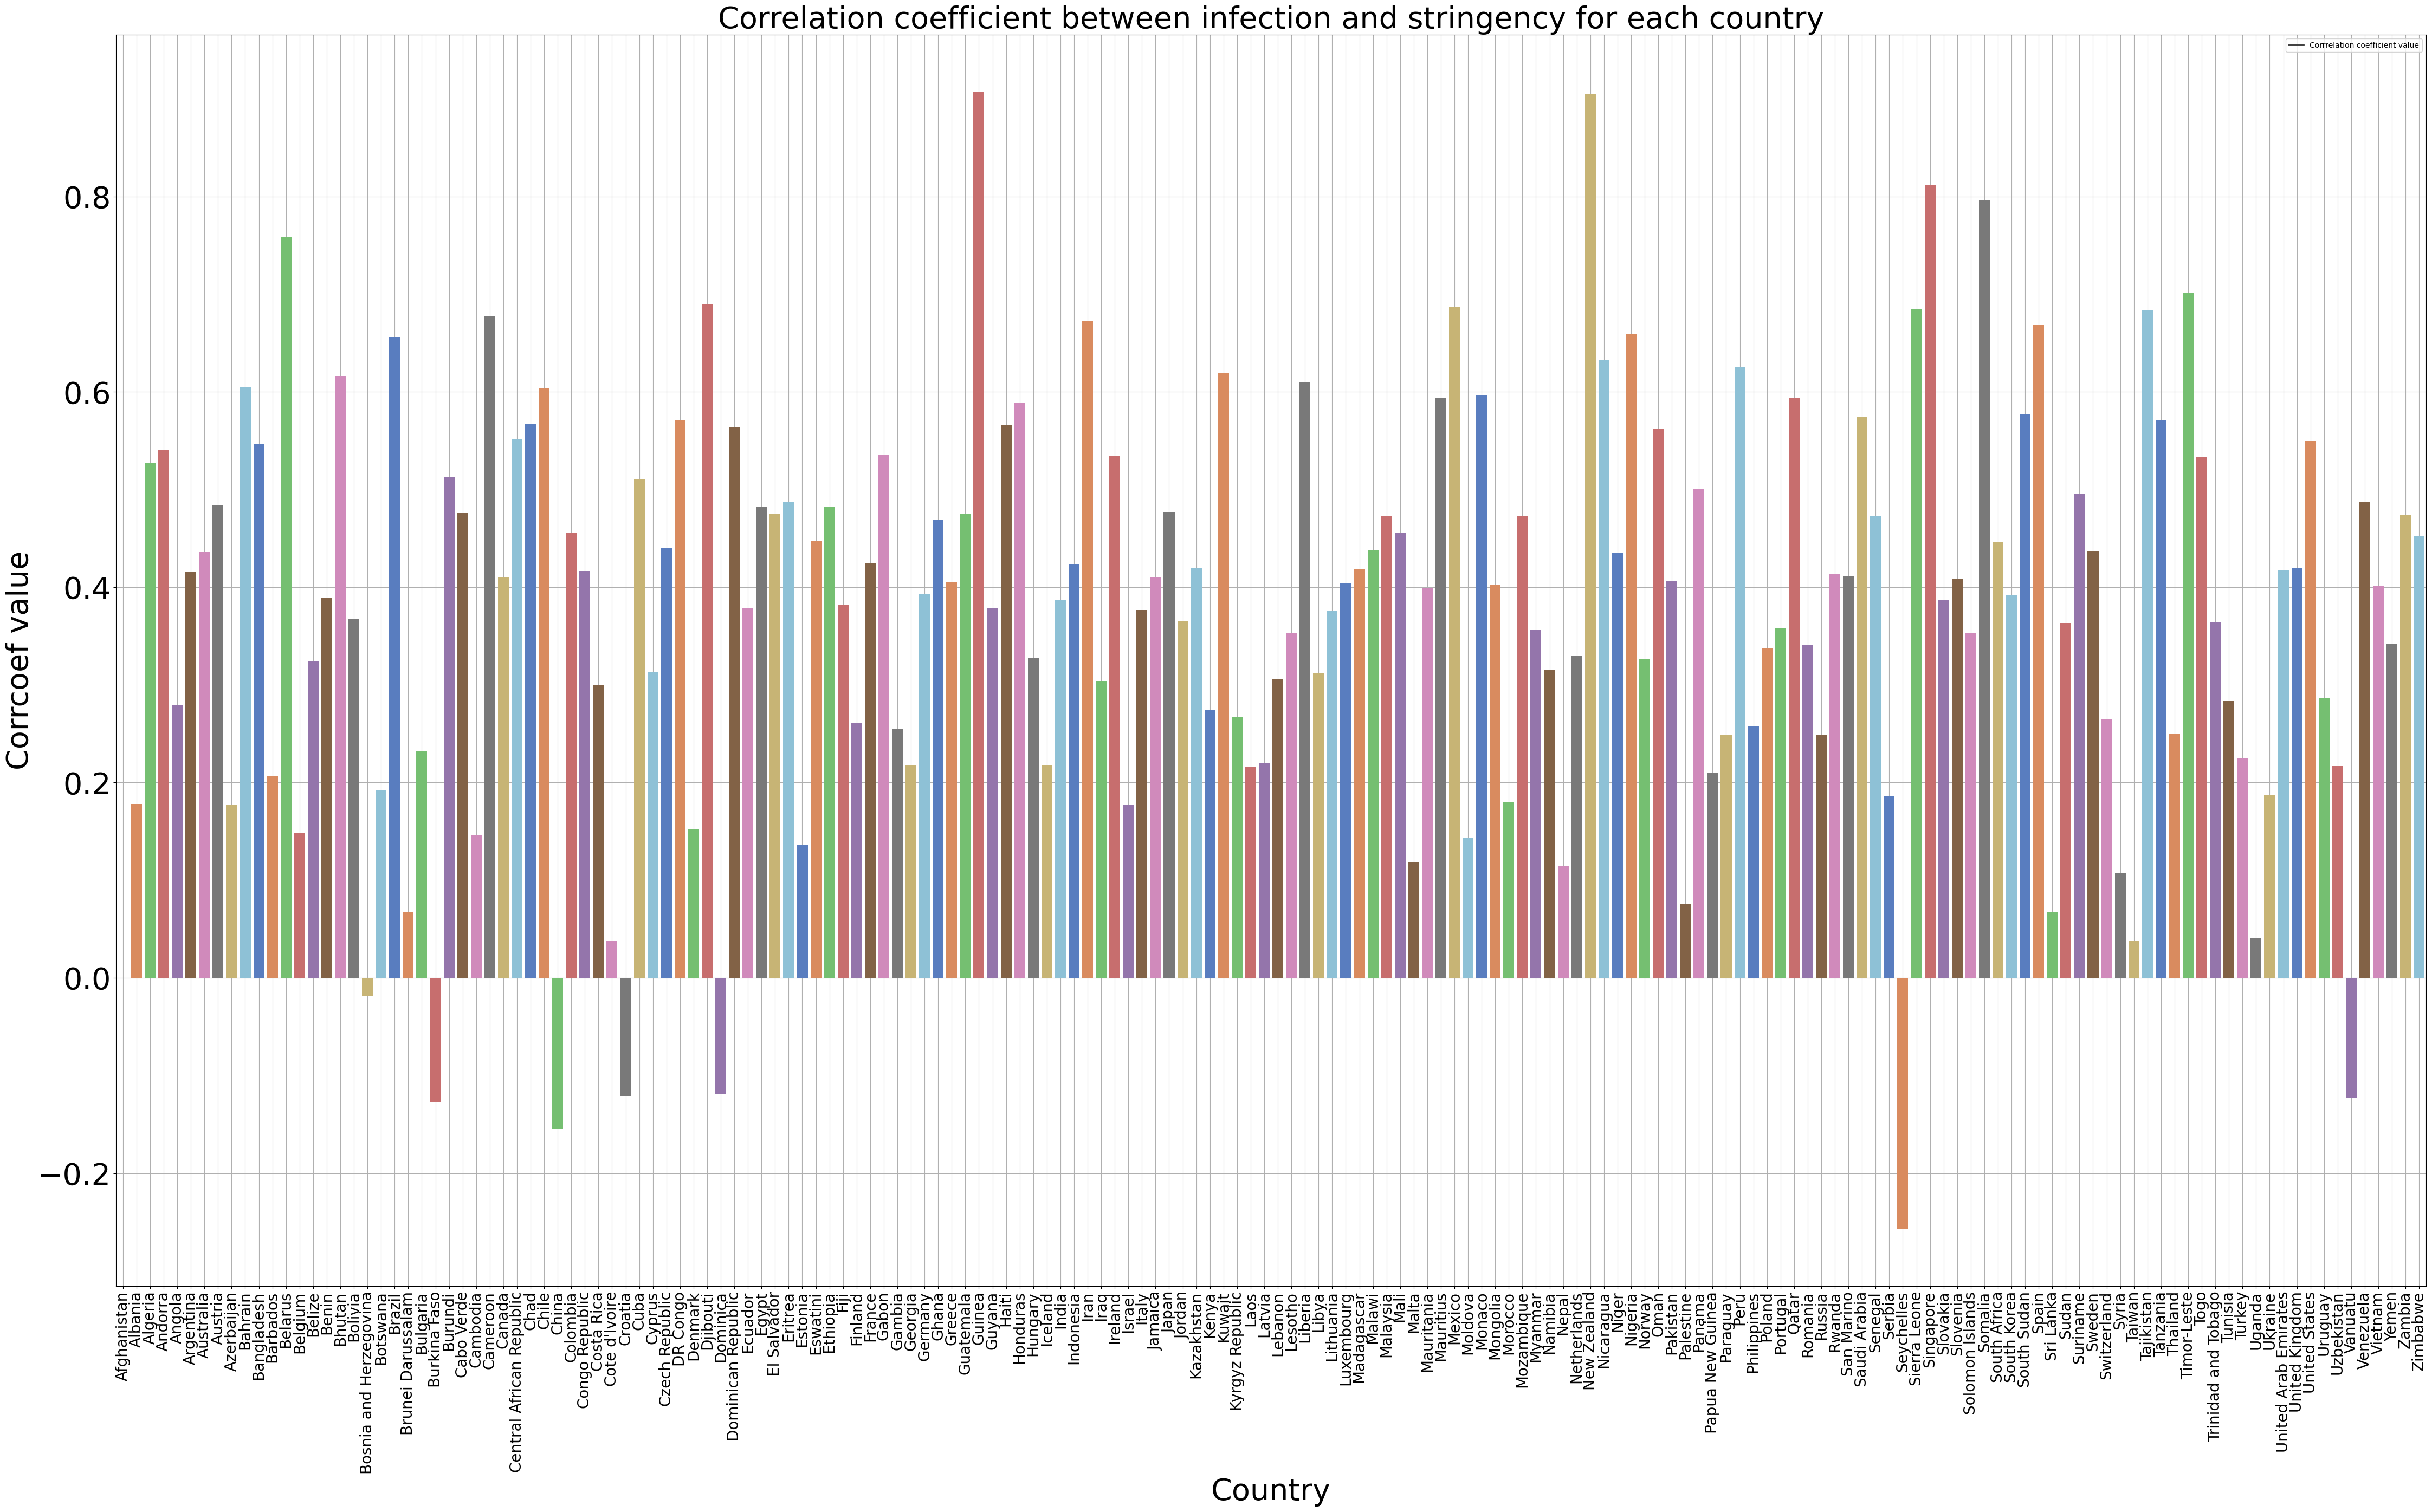

In [31]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(country_r_value_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(55,30))

sns.barplot(x= "standard_names", y = "corrcoef", data = country_r_value_df, palette = "muted" , zorder = 3)
# plt.bar(x_axis, country_r_value_df["corrcoef"], color='blue', align="center", width = 0.52, zorder = 3)
plt.xticks(tick_locations, country, rotation="vertical" , fontsize =20)

# Set limits for x & y axes
# plt.xlim(-0.55, len(x_axis)-0.45)
# plt.ylim(0, max(country_r_value_df["corrcoef"])*1.05)

# Set labels for axes & title for the chart
plt.title("Correlation coefficient between infection and stringency for each country", fontsize =40)
plt.xlabel("Country", fontsize =40)
plt.ylabel("Corrcoef value", fontsize =40)

# Creating and displaying legend
column_name = ["Corrrelation coefficient value"]
plt.legend(column_name,loc="best")
plt.grid(zorder=0)
plt.yticks(fontsize = 40)
# Display the plot
plt.savefig("Images/bar_chart_corrcoef.png")
plt.show()

In [25]:
neg_countries = country_r_value_df.loc[country_r_value_df["corrcoef"] > .7].reset_index(drop = True)
neg_countries

standard_names  corrcoef   p_value   r_value
0        Belarus    0.7581  0.004274  0.758097
1         Guinea    0.9076  0.000045  0.907572
2    New Zealand    0.9054  0.000051  0.905409
3      Singapore    0.8116  0.001349  0.811612
4        Somalia    0.7965  0.001931  0.796505
5    Timor-Leste    0.7015  0.011014  0.701471

The correlation coefficient of Bosnia and Herzegovina is : -0.01833856777972714


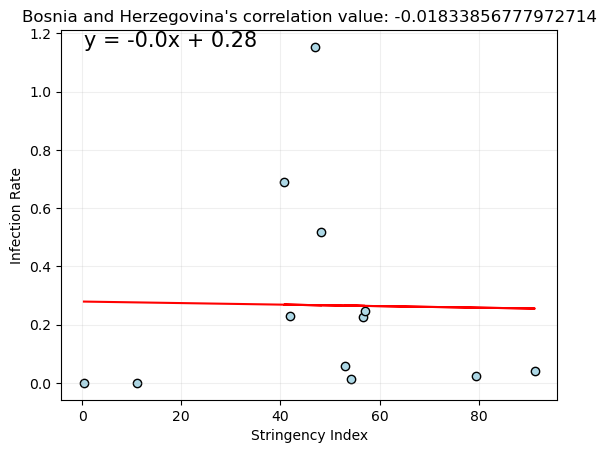

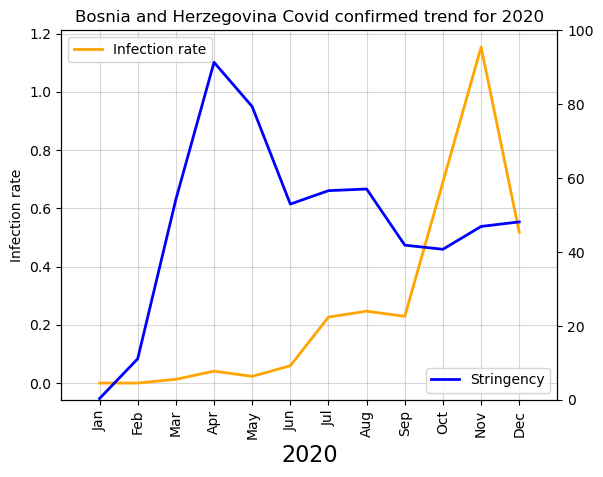

The correlation coefficient of Burkina Faso is : -0.1269672450511367


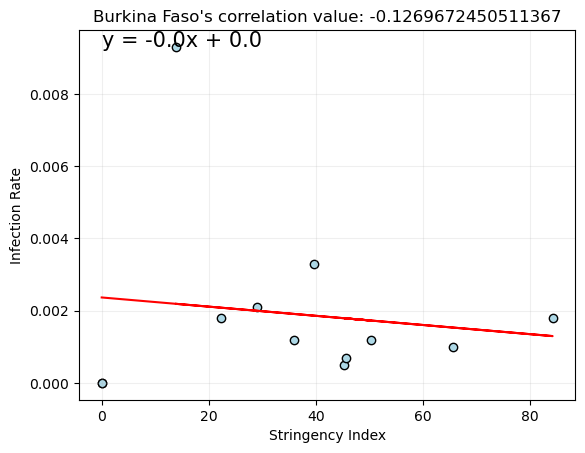

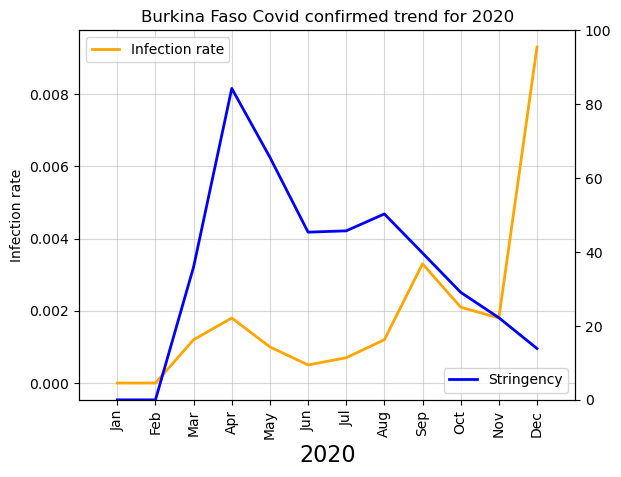

The correlation coefficient of China is : -0.1548340392734265


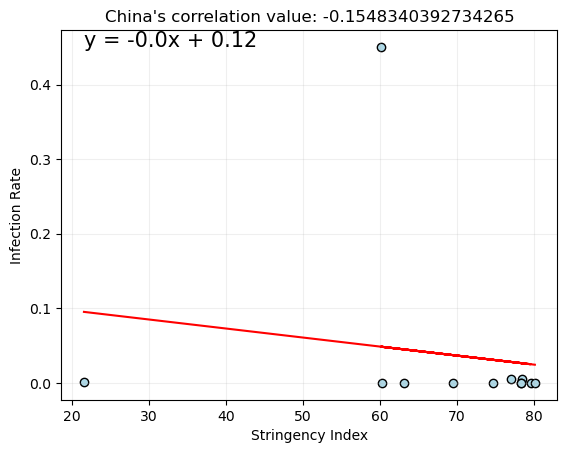

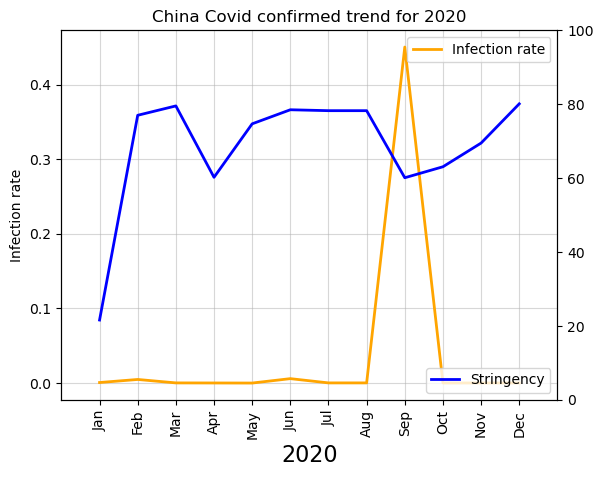

The correlation coefficient of Croatia is : -0.12090221390544506


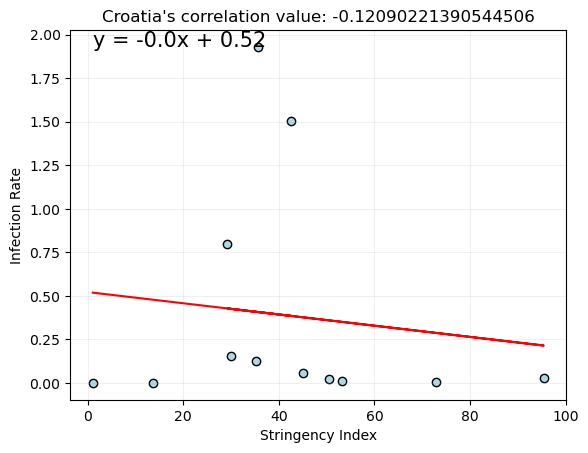

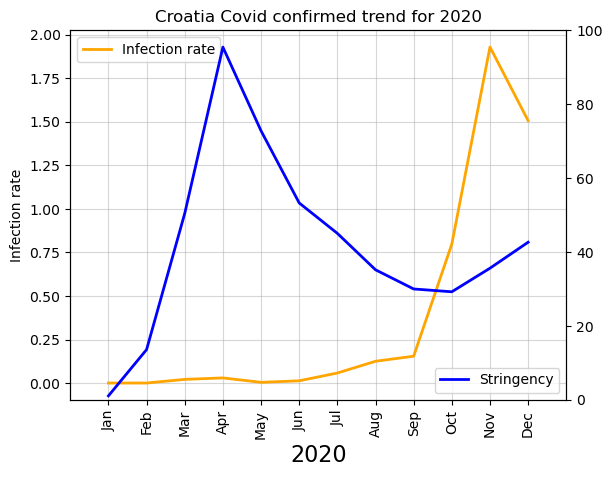

The correlation coefficient of Dominica is : -0.1191541298400267


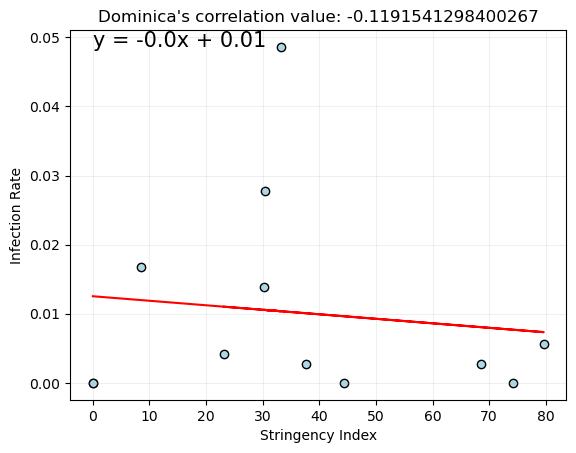

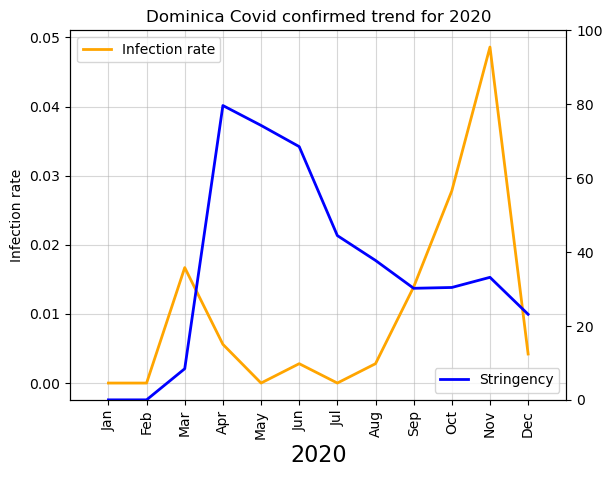

The correlation coefficient of Seychelles is : -0.25736569787472086


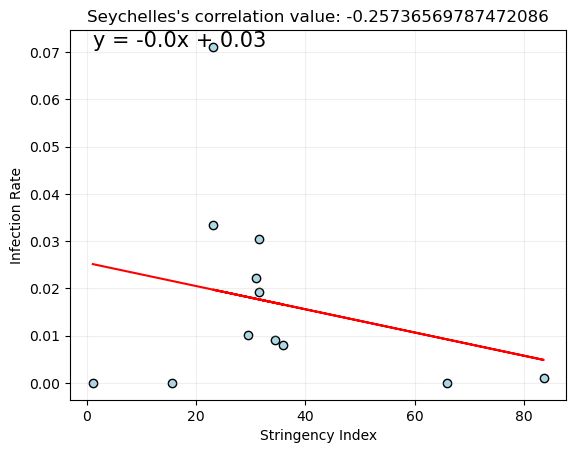

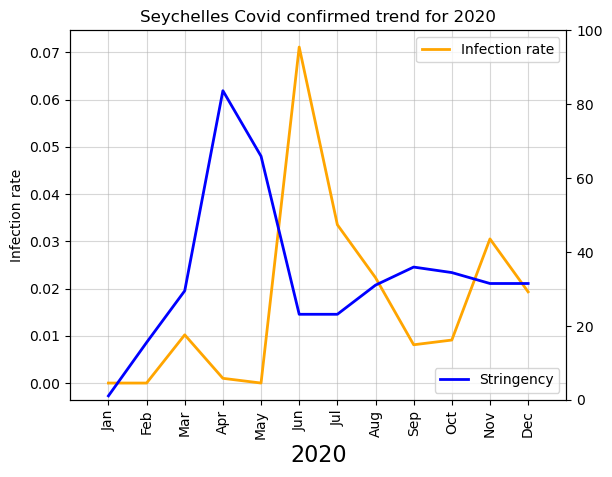

The correlation coefficient of Vanuatu is : -0.12236248459868383


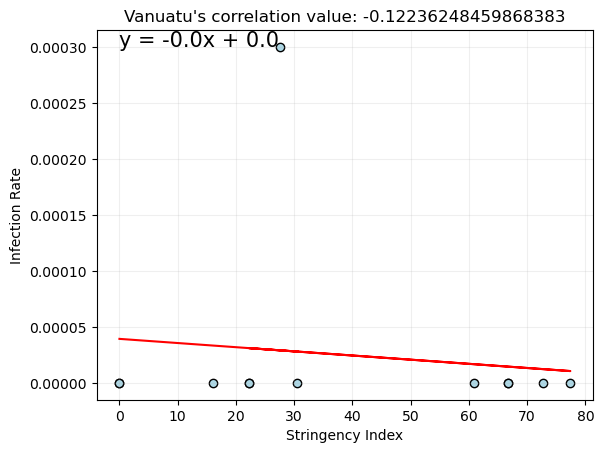

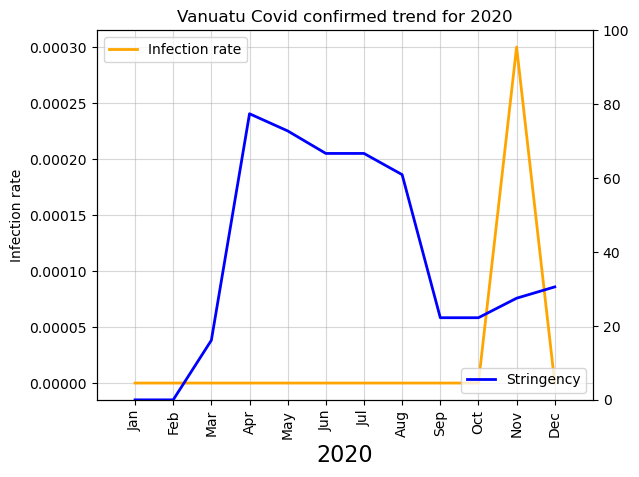

In [17]:
for i in range(len(neg_countries)):
    country = neg_countries.iloc[i,0]
#     line_plots(country)
    ln_rg_country(country)
    line_plots(country)

In [21]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

In [22]:
# for i in range(len(sample)):
#     country = sample.iloc[i,0]
#     data = ultimate_no_null_df.loc[ultimate_no_null_df["standard_names"] == country]
#     max_count = data["Confirmed"].max()
#     plt.rcdefaults()
#     fig,ax1 = plt.subplots()
#     plt.grid(alpha = .5, zorder = 0)
#     color = "tab:green"
    
#     ax1.set_xlabel("Month", fontsize =16)
#     qualitative_colors = sns.color_palette("YlOrRd", 12)
#     ax1 = sns.barplot(x= "month", y = "Confirmed", data = data, palette = colors_from_values(data["Confirmed"], "YlOrRd") , zorder = 3)
# #
#     if max_count >= 1000000:
#         ax1.set_ylabel("Confirmed in millions", fontsize =16)
   
        
#     ax2 = ax1.twinx()
#     color = "tab:red"
    
#     ax2 = sns.lineplot(x= "month", y = "stringency_index", data = data , zorder = 3).set_title(f"Confirmed vs. Stringency Index for {country}")
    
    
#     plt.show()

The correlation coefficient of United States is : 0.5499250670633851


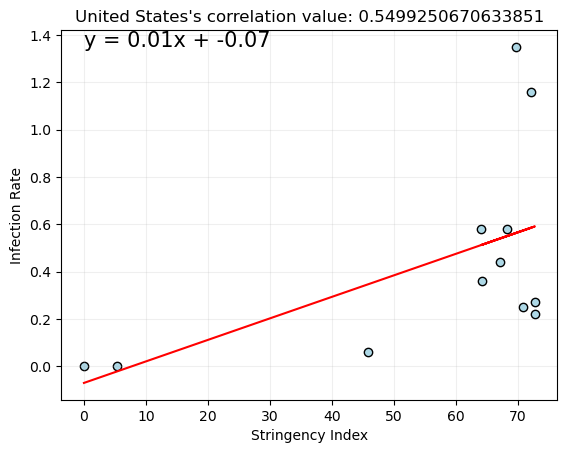

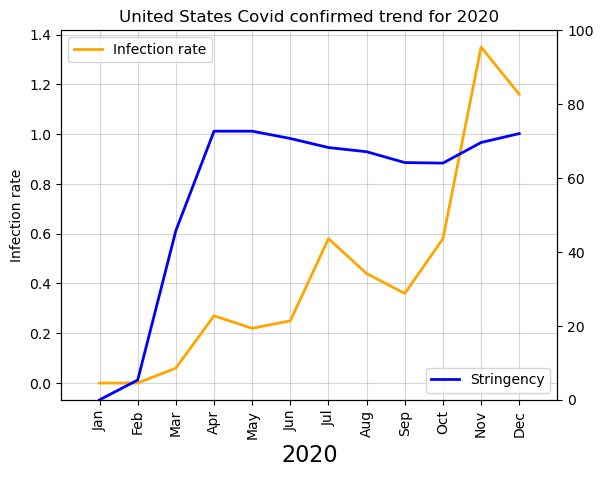

The correlation coefficient of India is : 0.3785245991629799


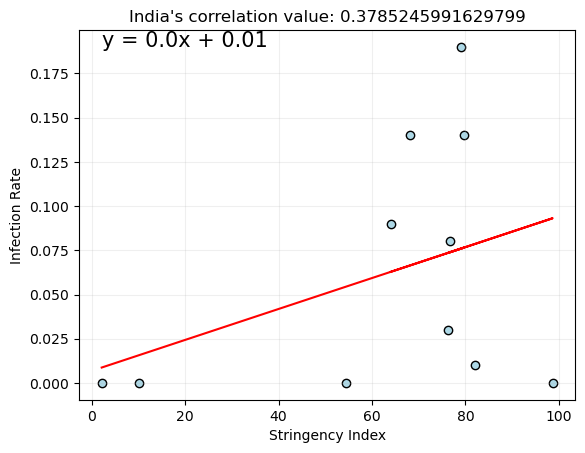

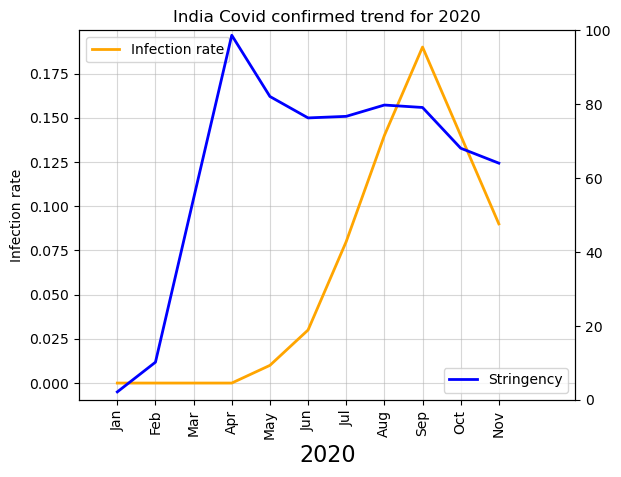

The correlation coefficient of Brazil is : 0.655648415654577


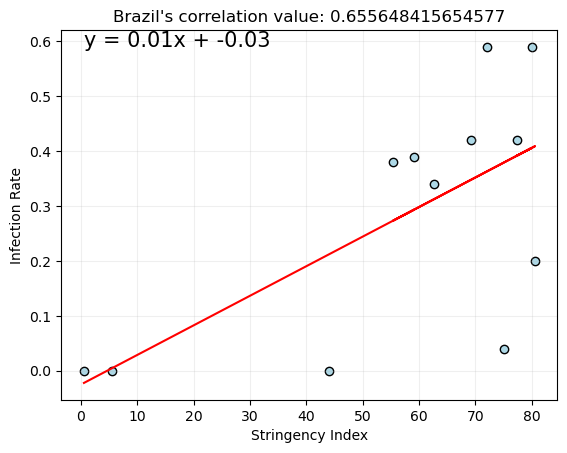

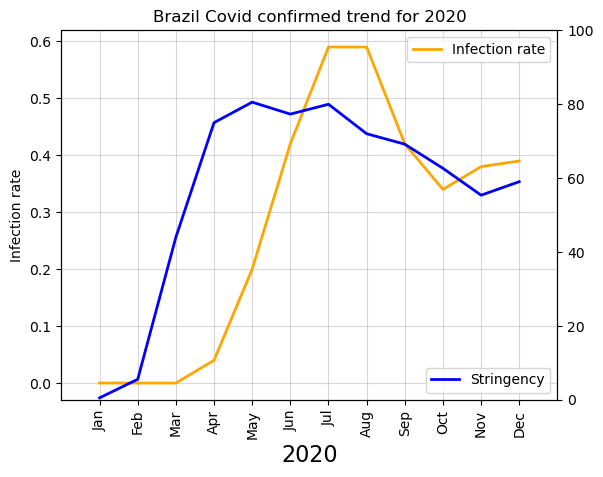

The correlation coefficient of China is : -0.15360541707799724


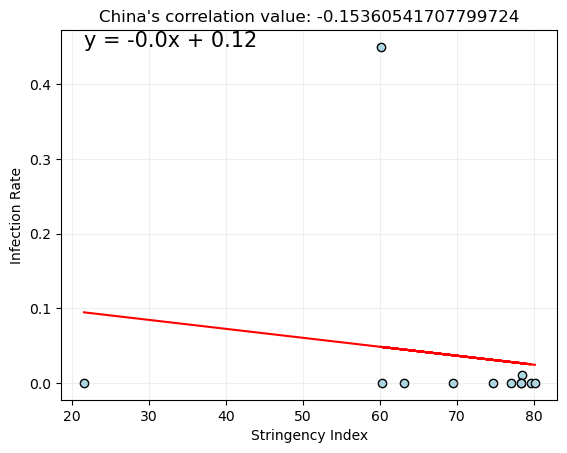

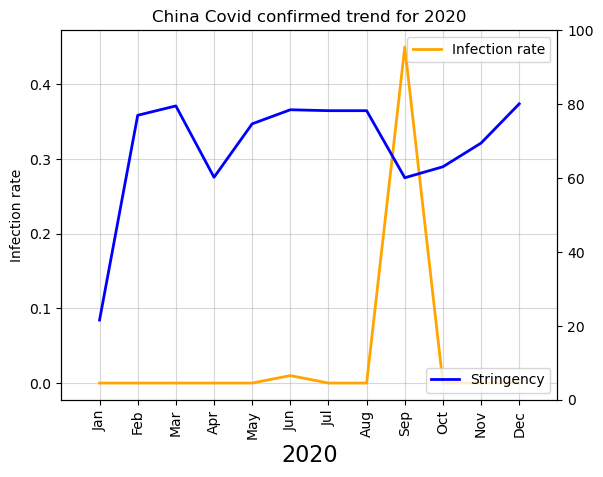

The correlation coefficient of France is : 0.42520027141438044


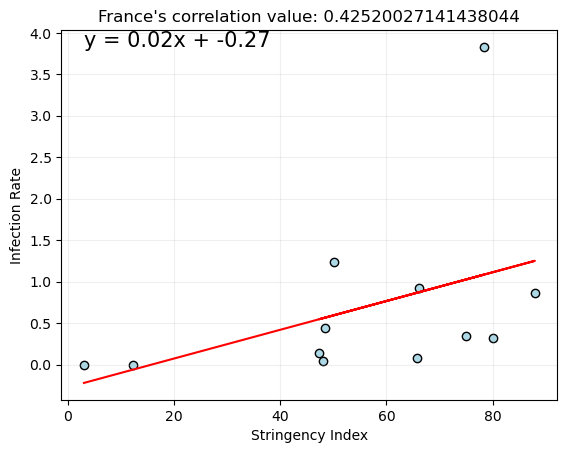

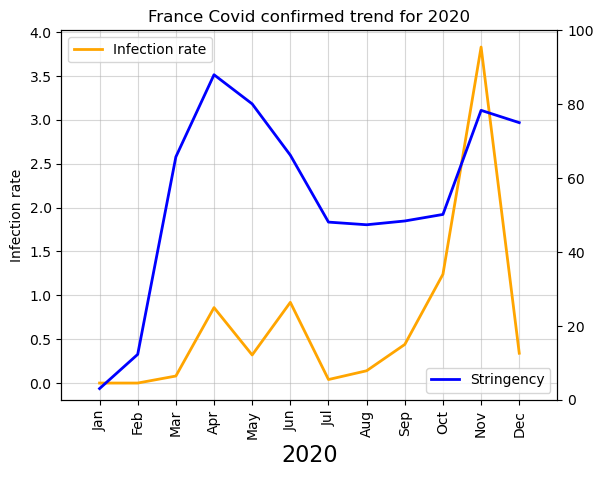

The correlation coefficient of Russia is : 0.2522334346122899


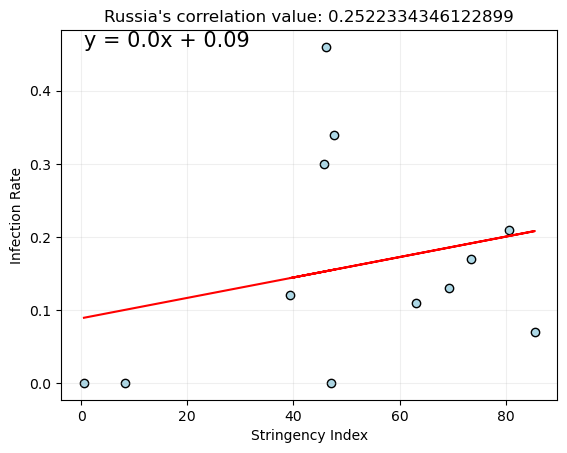

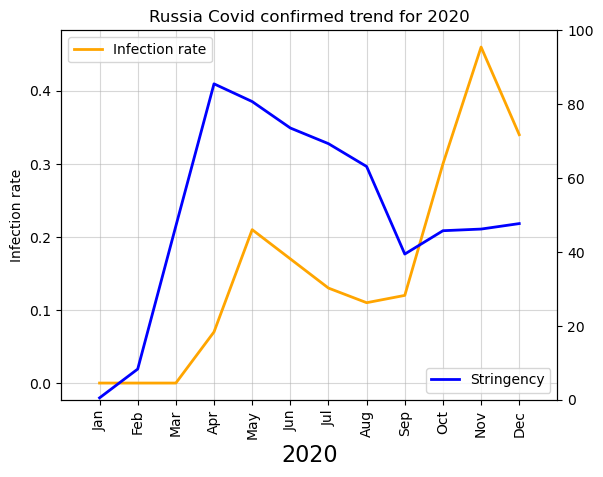

The correlation coefficient of Spain is : 0.6681299836047067


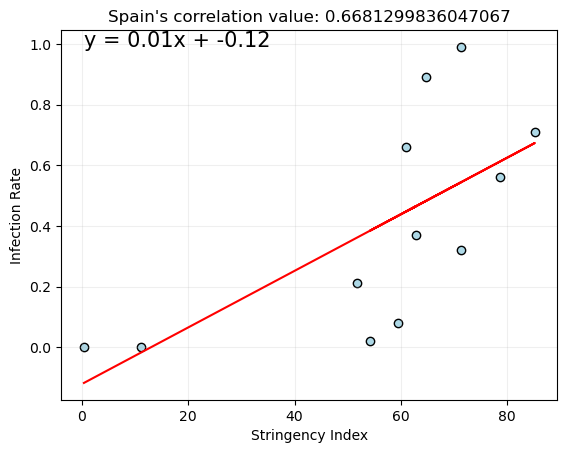

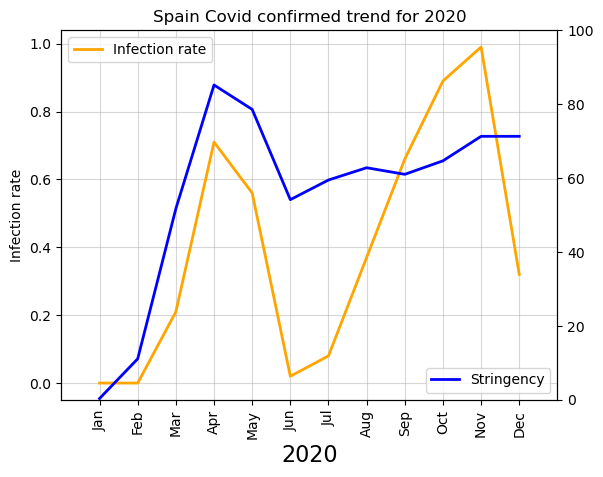

The correlation coefficient of United Kingdom is : 0.4201984723051414


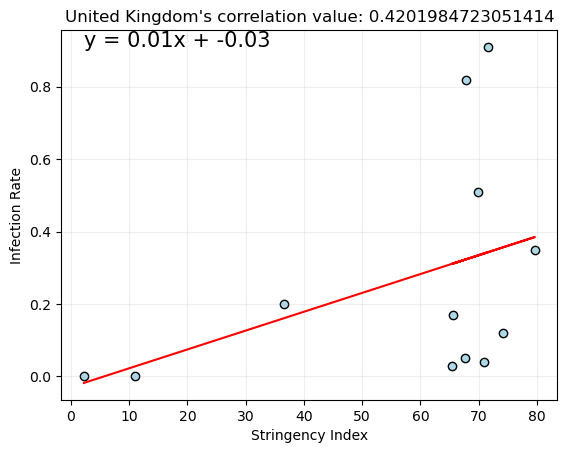

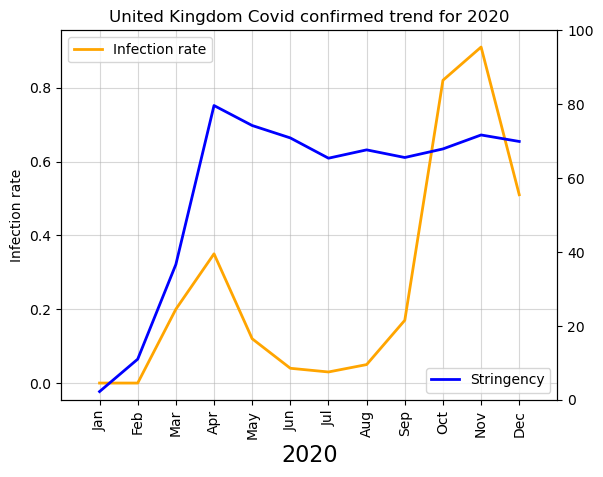

The correlation coefficient of Italy is : 0.37501285993770855


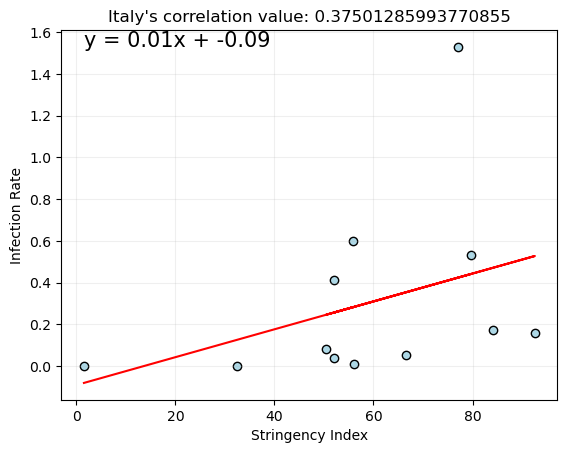

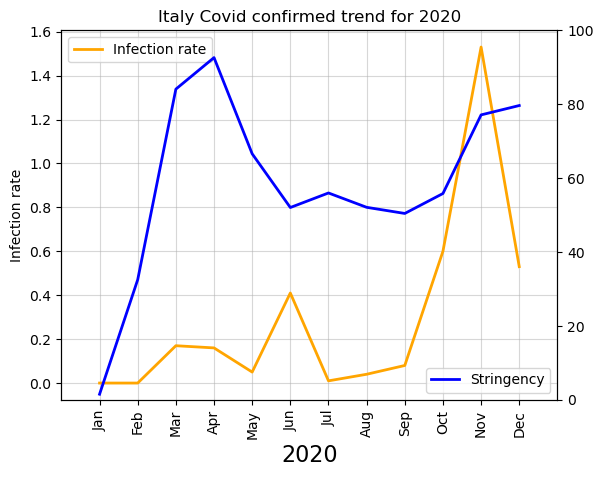

The correlation coefficient of Turkey is : 0.22548145394723063


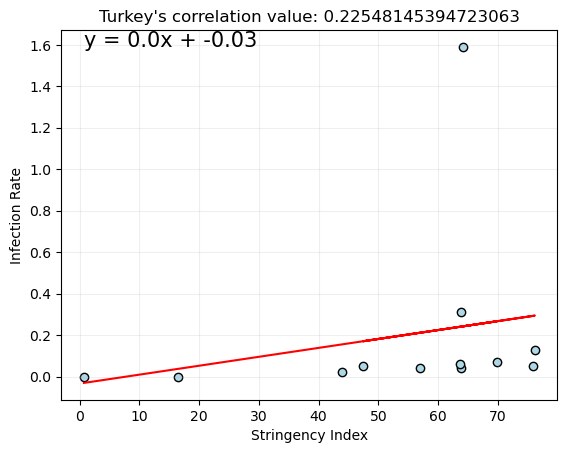

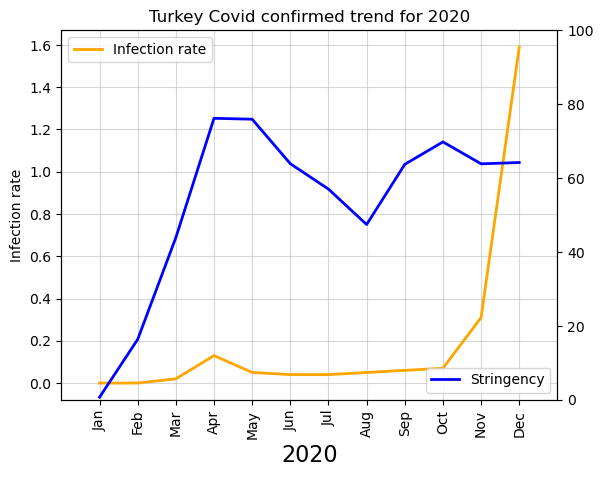

The correlation coefficient of Nigeria is : 0.4376728408035107


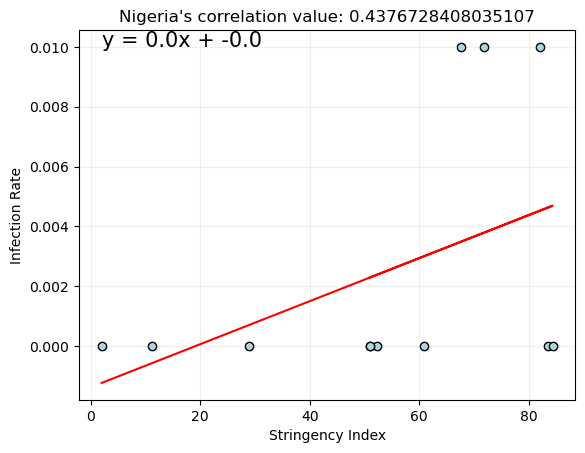

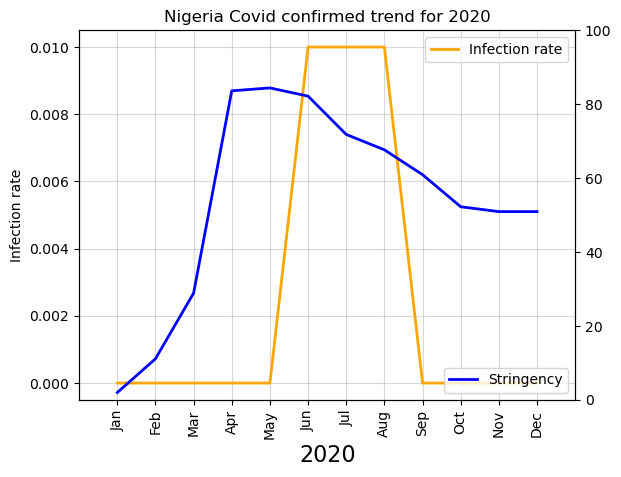

The correlation coefficient of Uzbekistan is : 0.20750595753904222


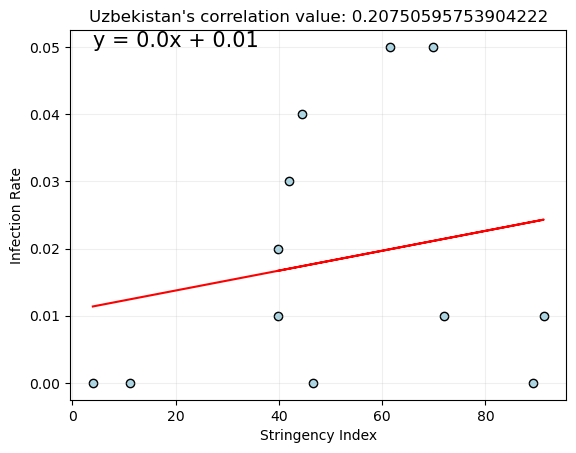

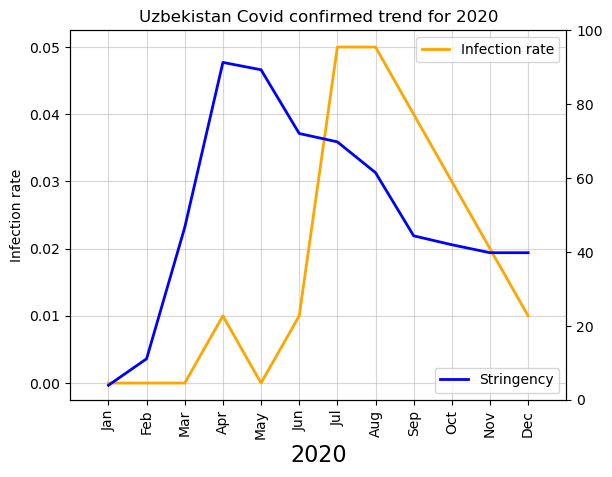

The correlation coefficient of Malaysia is : 0.48354131185211435


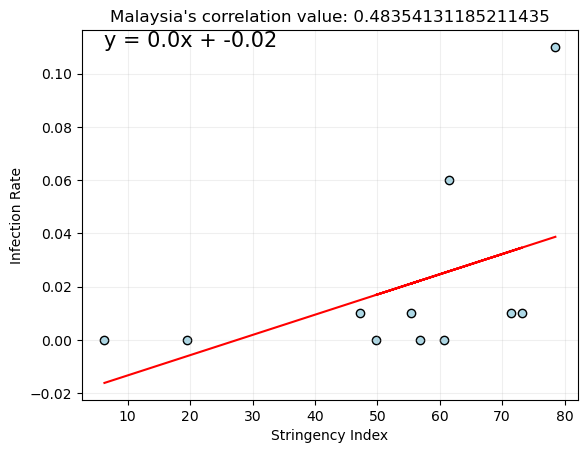

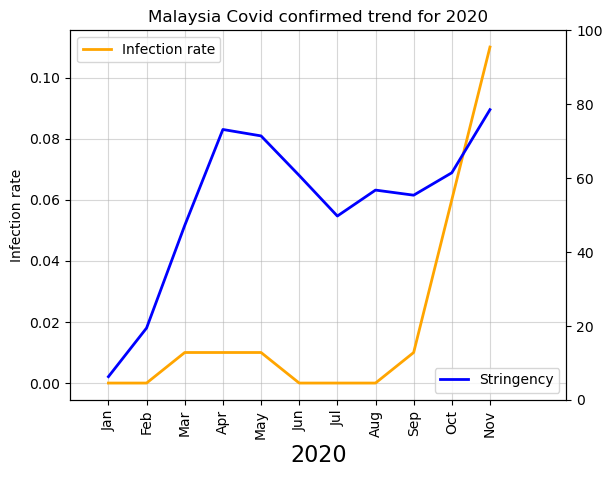

The correlation coefficient of Singapore is : 0.8097093783717816


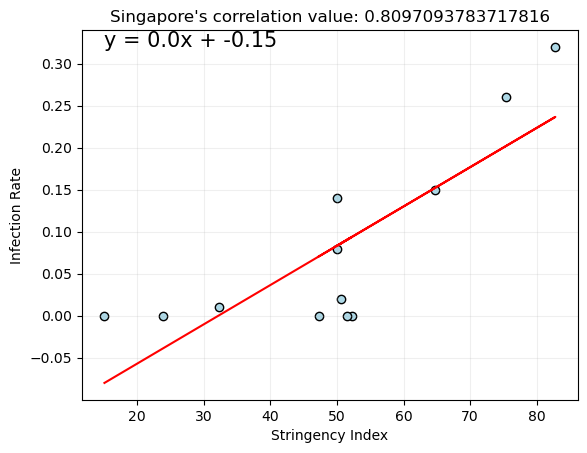

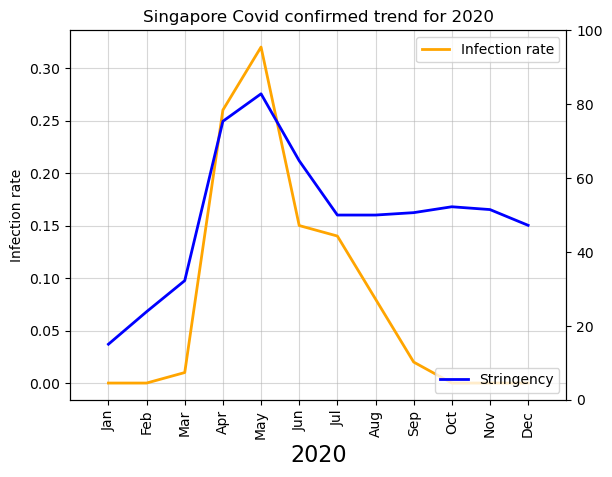

The correlation coefficient of Ghana is : 0.4910024035296588


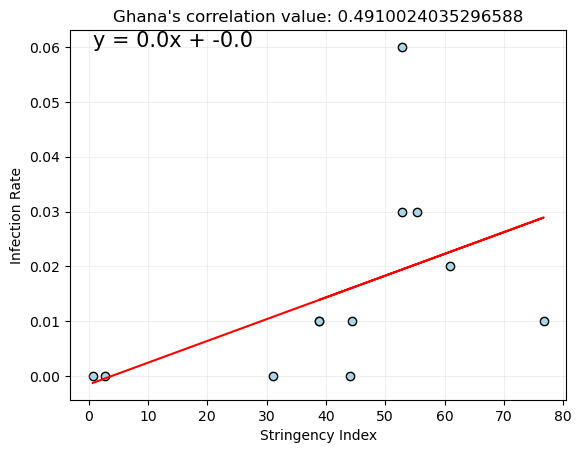

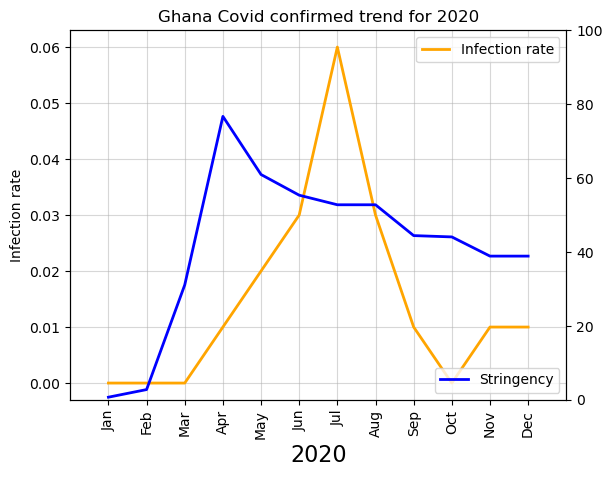

The correlation coefficient of Albania is : 0.1793782396461487


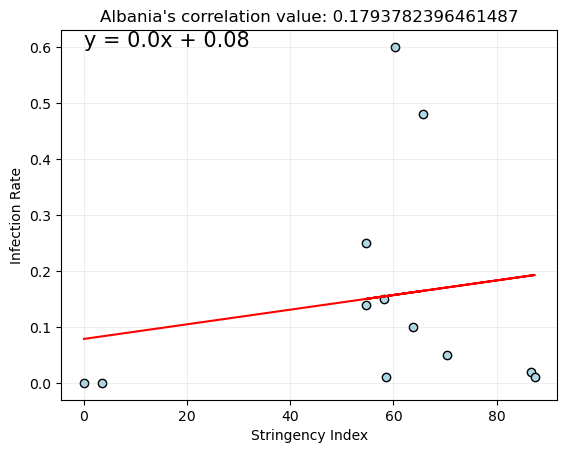

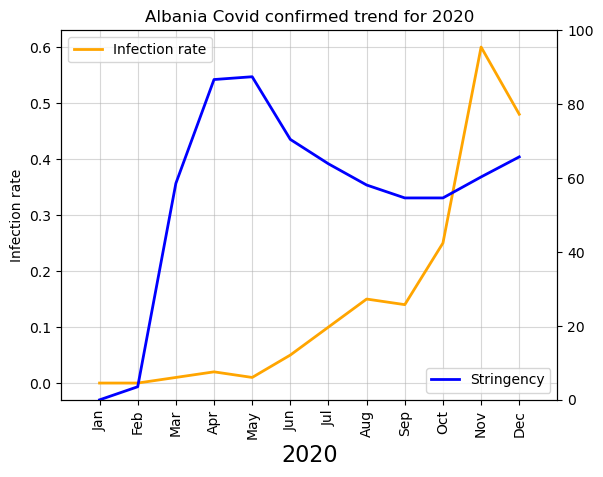

The correlation coefficient of Luxembourg is : 0.40495473111811897


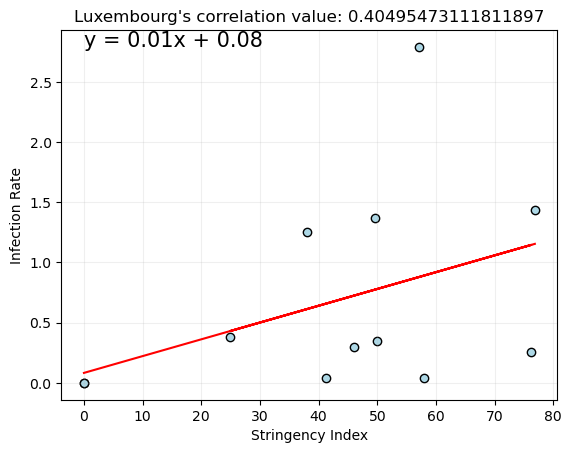

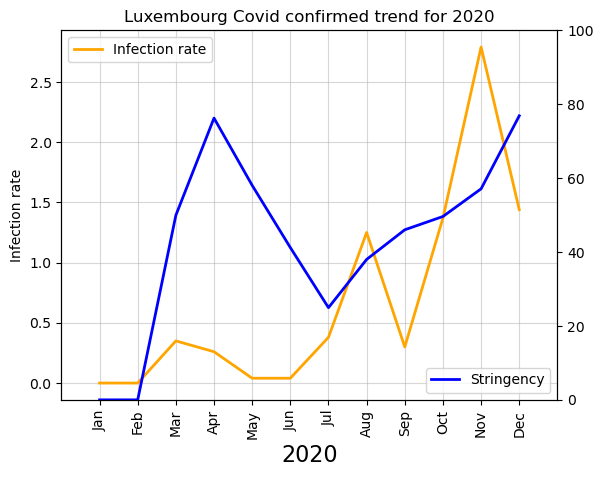

The correlation coefficient of South Korea is : 0.28652674598176986


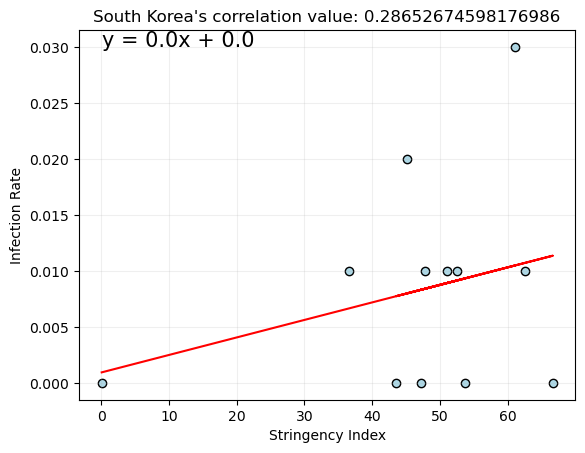

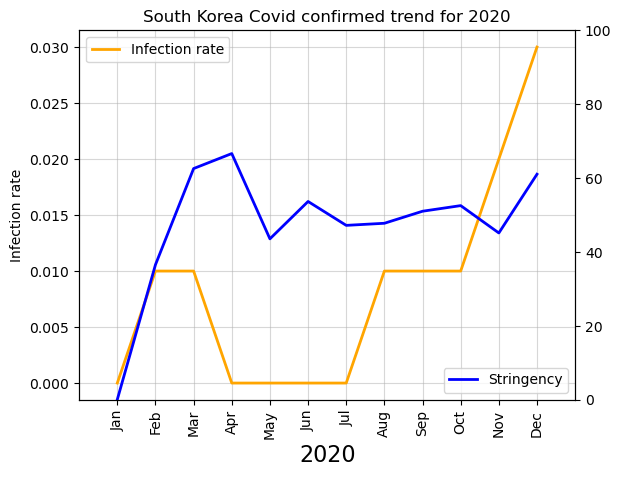

The correlation coefficient of Finland is : 0.2519000779272803


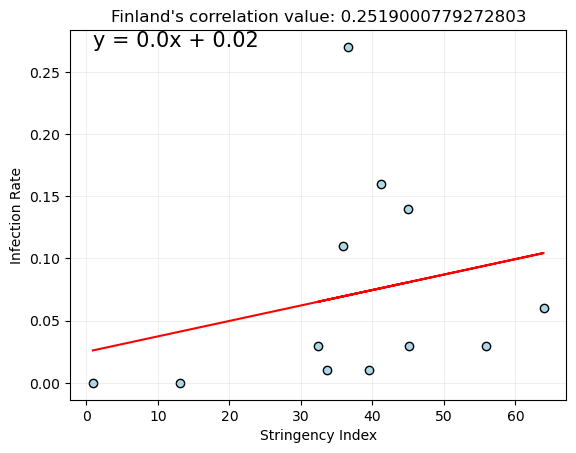

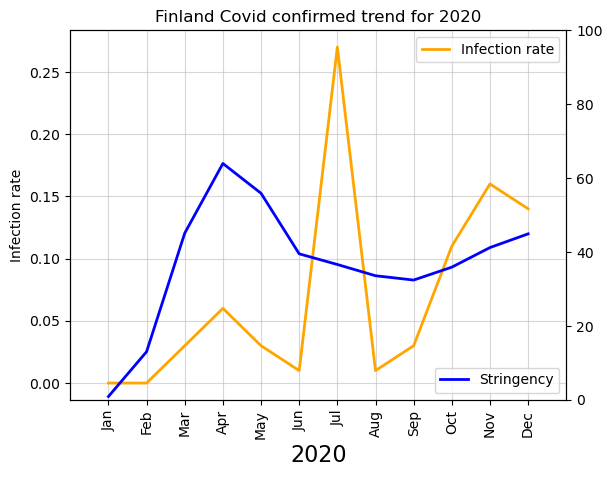

The correlation coefficient of Afghanistan is : 0.6231655530885698


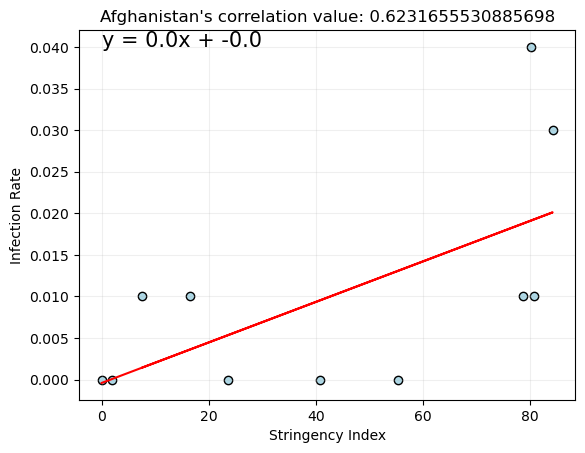

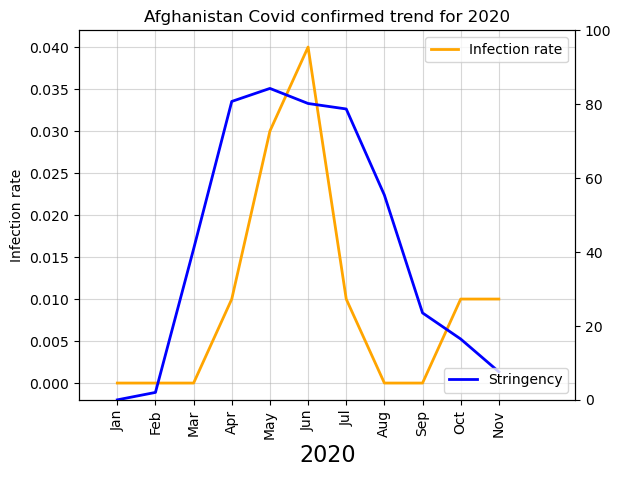

The correlation coefficient of Barbados is : 0.1327093509571045


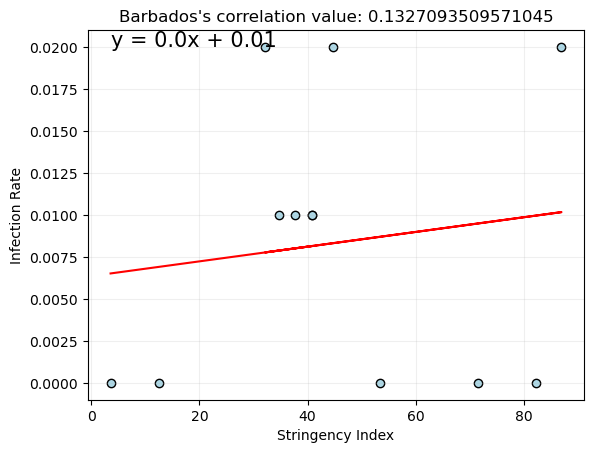

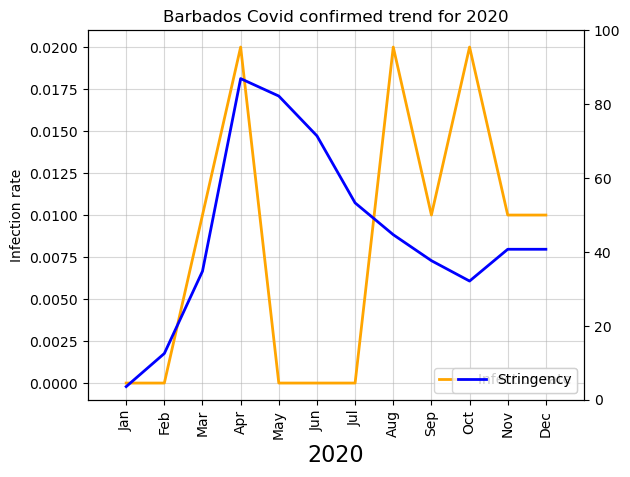

The correlation coefficient of Seychelles is : -0.2624689841491885


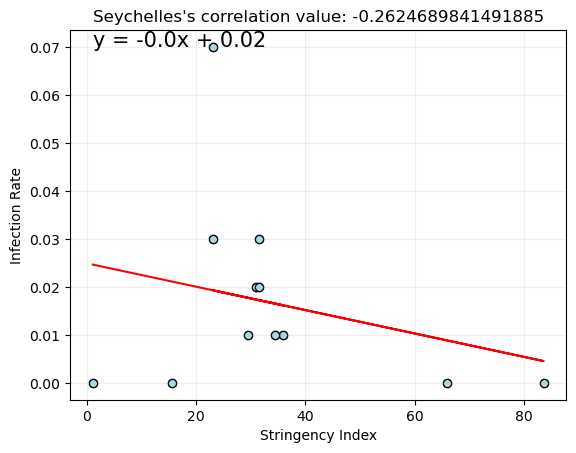

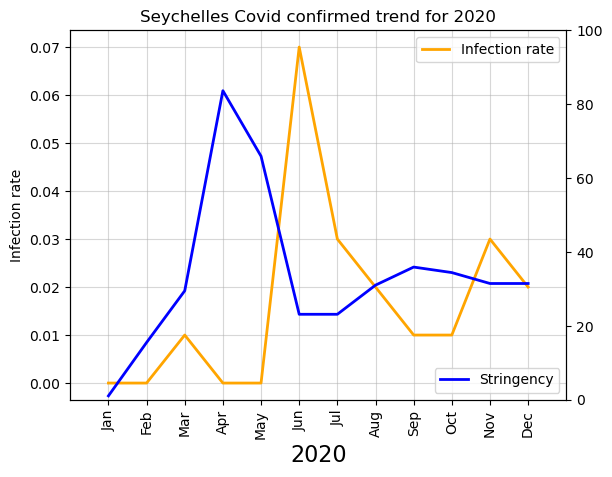

The correlation coefficient of Monaco is : 0.597144360409488


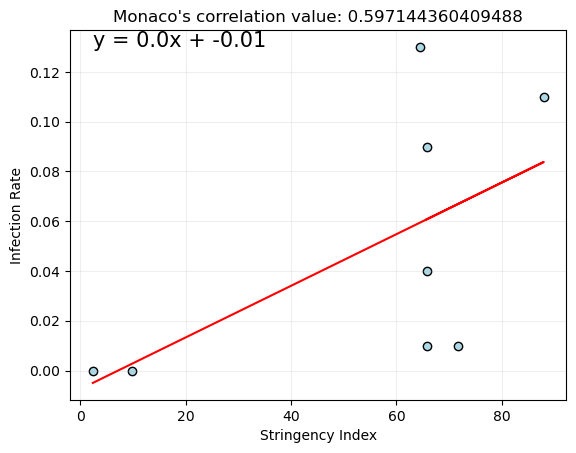

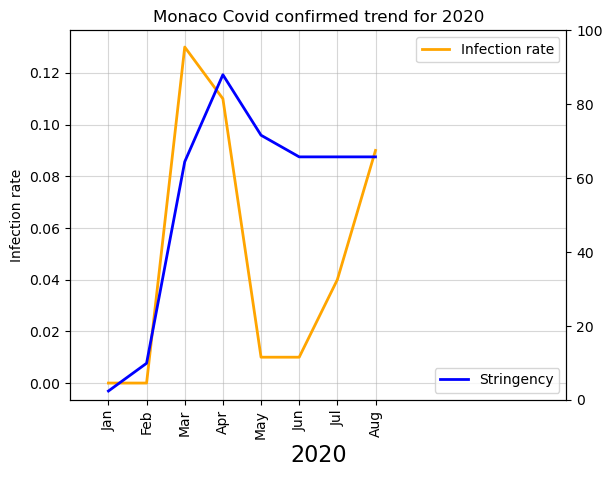

The correlation coefficient of Brunei Darussalam is : 0.030693509513952354


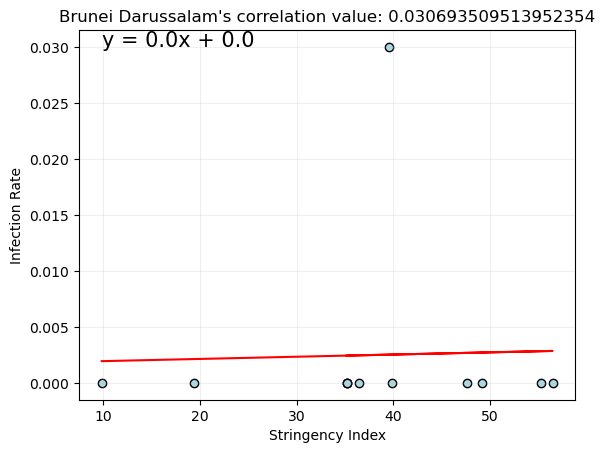

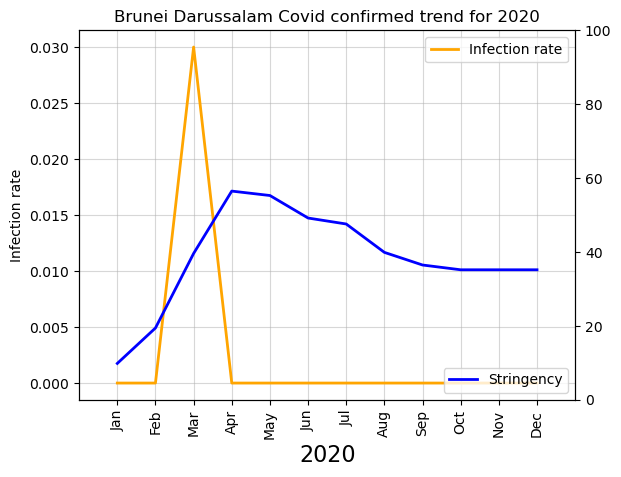

The correlation coefficient of Dominica is : -0.09717922099586712


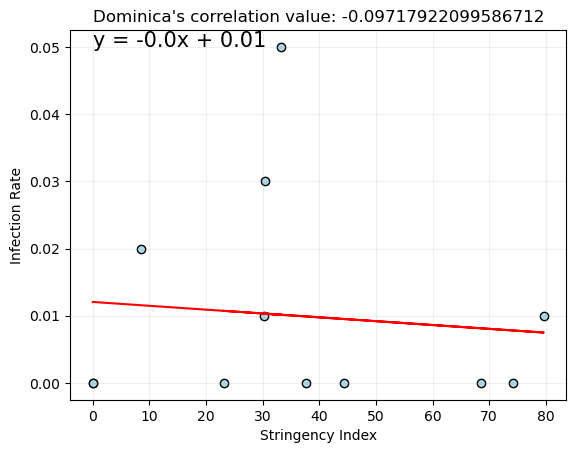

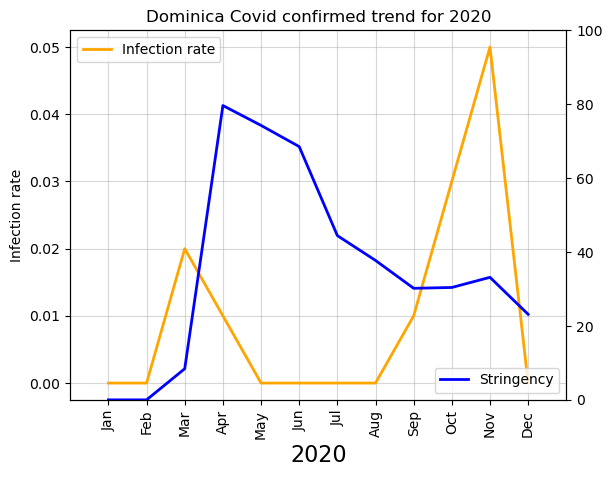

The correlation coefficient of Fiji is : 0.0


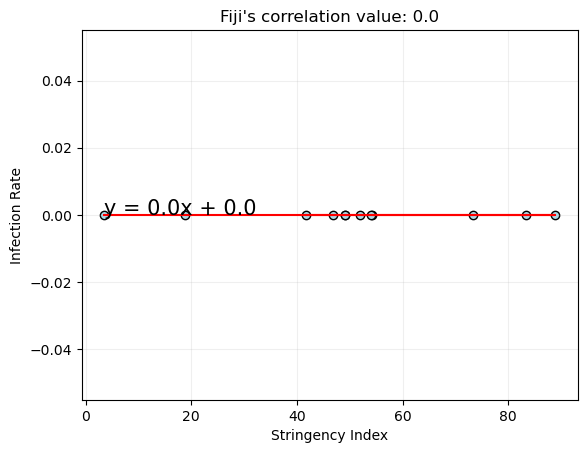

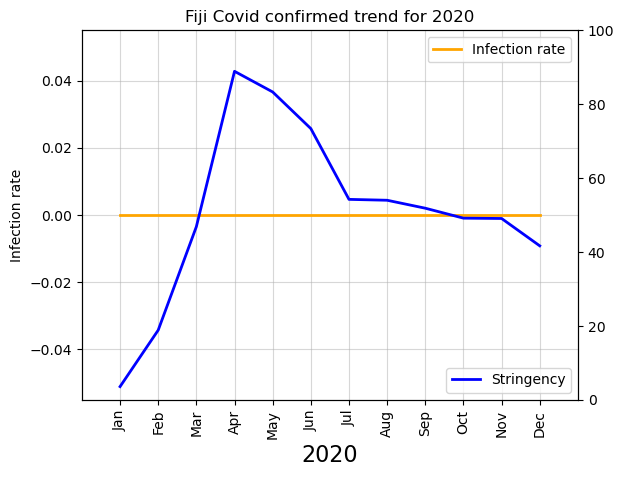

The correlation coefficient of Laos is : 0.0


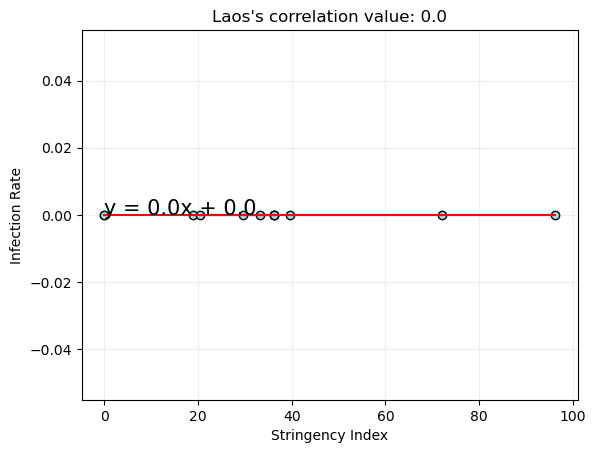

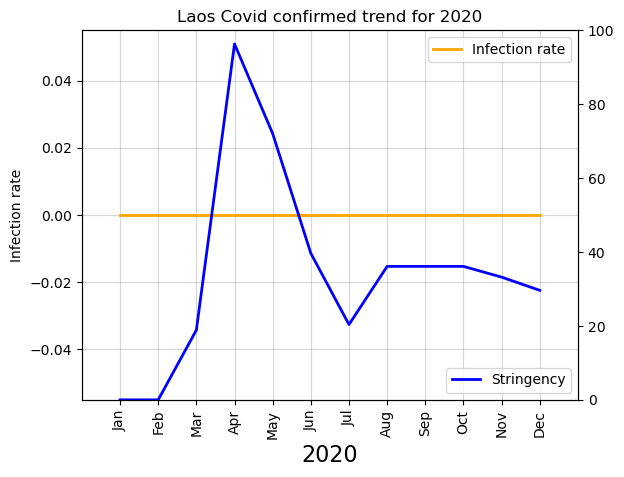

The correlation coefficient of Timor-Leste is : 0.0


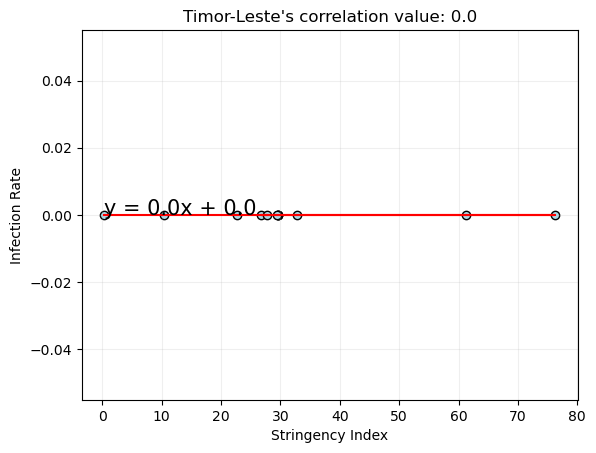

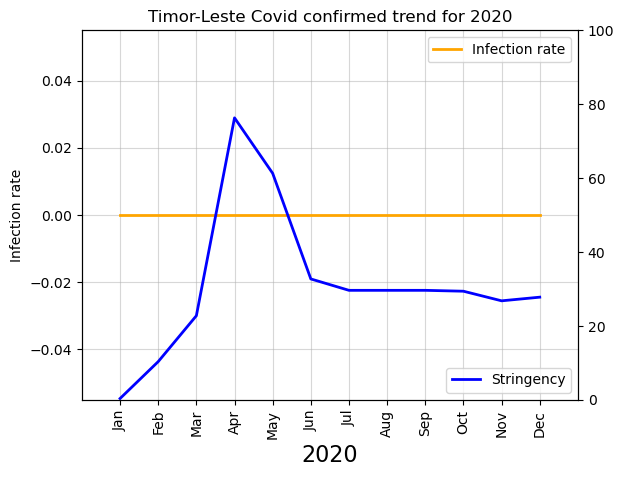

The correlation coefficient of Solomon Islands is : 0.0


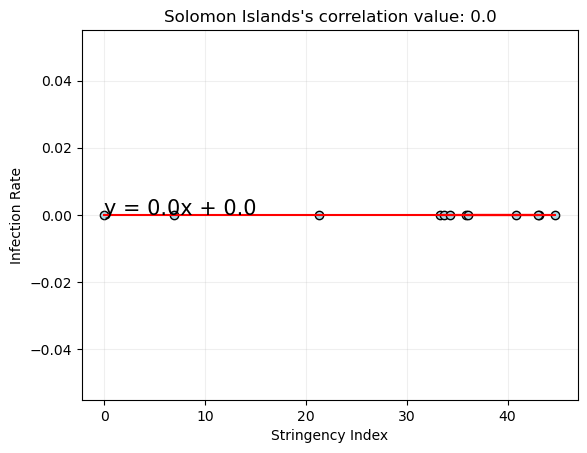

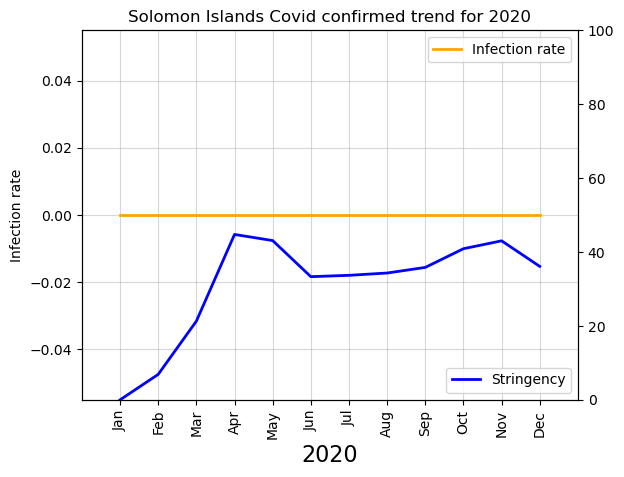

The correlation coefficient of Vanuatu is : 0.0


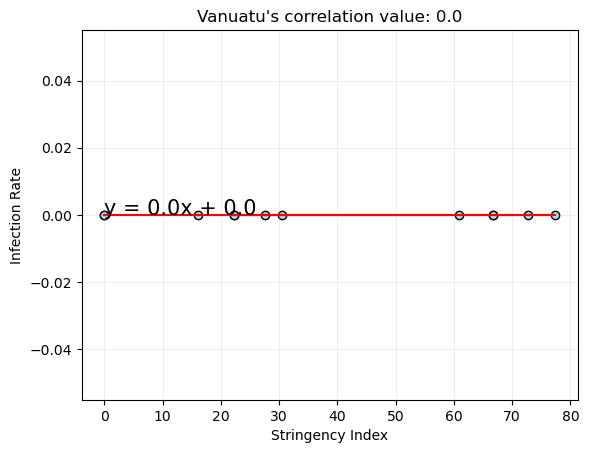

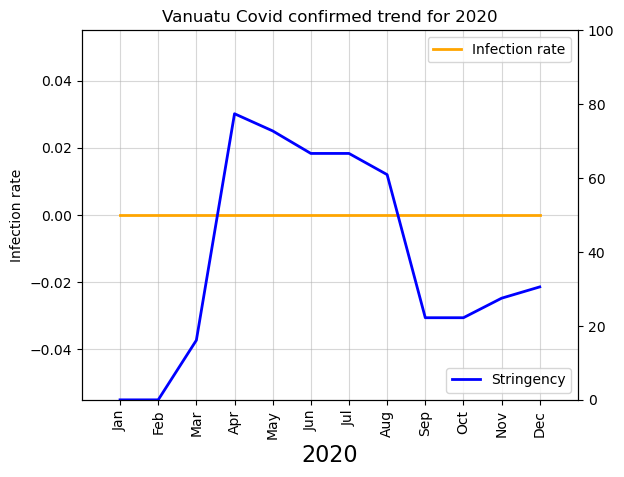

In [144]:
for i in range(len(sample)):
    country = sample.iloc[i,0]
#     line_plots(country)
    ln_rg_country(country)
    line_plots(country)

In [74]:
test_df.head()

standard_names ISO_2 ISO_3  Population (2020)  Density (P/Km²)  month  \
0    Afghanistan    AF   AFG           39074280               60      6   
1        Albania    AL   ALB            2877239              105     11   
2        Algeria    DZ   DZA           43984569               18     11   
3        Andorra    AD   AND              77287              164     10   
4         Angola    AO   AGO           33032075               26     10   

   Confirmed  Infection_rate_f  total_inf_rate  stringency_hike_1Q  
0    16299.0            0.0417          0.1183           40.831935  
1    17307.0            0.6015          1.8074           58.570968  
2    25257.0            0.0574          0.2146           37.486129  
3     2706.0            3.5012          9.7286           21.624839  
4     5833.0            0.0177          0.0502           24.400000

In [25]:
# Define function for calculating linear regression and scatter plot with linear regression plot
def linear_regression_test(x,y,colx,coly):
#     print(f"The correlation coefficient of {country} is : {np.nan_to_num(round(st.pearsonr(x, y)[0],4))}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    print(f"The correlation coefficient is : {rvalue}")
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, c = "lightblue", edgecolor = "black")
    plt.plot(x,regress_values,"r-")
#     plt.title(f"{country}'s correlation value: {rvalue}")
    plt.xlabel(f"{colx}")
    plt.ylabel(f"{coly}")
    plt.grid(alpha = .2)
    return line_eq

# Define a fuction for annotating
def plot_annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="black")

In [31]:
def ln_rg_test():
    
    x = test_df["stringency_hike_1Q"].loc[test_df["Population (2020)"] >= 5000000]
    x_axis = "stringency_hike_1Q"
    
    y = test_df["total_inf_rate"].loc[test_df["Population (2020)"] >= 5000000]
    y_axis = "total_inf_rate"
    
    y1= test_df["Infection_rate_f"].loc[test_df["Population (2020)"] >= 5000000]
    y1_axis = "Infection_rate_f"
    
    y2= test_df["Density (P/Km²)"].loc[test_df["Population (2020)"] >= 5000000]
    y2_axis = "Density (P/Km²)"
    
    y3= test_df["Population (2020)"].loc[test_df["Population (2020)"] >= 5000000]
    y3_axis = "Population (2020) in billions"
    
    a = x.min()
    b = y.max()
    b1 = y.min()
    c = y1.max()
    d = y2.max()
    e = y3.max()
    line_eq1 = linear_regression_test(x,y,x_axis,y_axis )
    plot_annotate(line_eq1, a, b)
    plt.show()
    line_eq2 = linear_regression_test(x,y1,x_axis,y1_axis)
    plot_annotate(line_eq2, a, c)
    plt.show()
    line_eq3 = linear_regression_test(x,y2,x_axis,y2_axis)
    plot_annotate(line_eq3, a, d)
    plt.show()
    line_eq4 = linear_regression_test(y,y2,y_axis,y2_axis)  
    plot_annotate(line_eq4, b1, d)
#     plt.savefig(f"Images/{country}_lin_reg_chart.png")
    plt.show()
    line_eq5 = linear_regression_test(y,y3,y_axis,y3_axis)  
    plot_annotate(line_eq5, b1, e)
    plt.show()

The correlation coefficient is : 0.47957192984588415


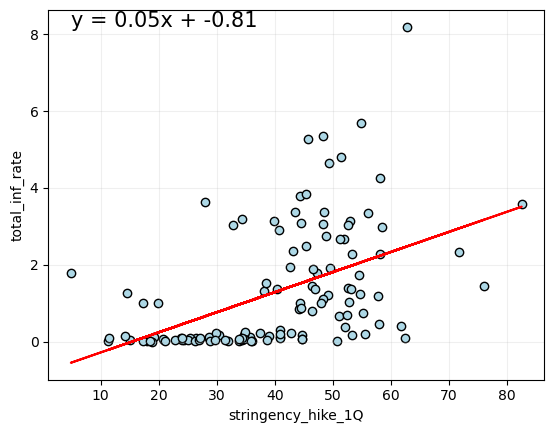

The correlation coefficient is : 0.4642717468241893


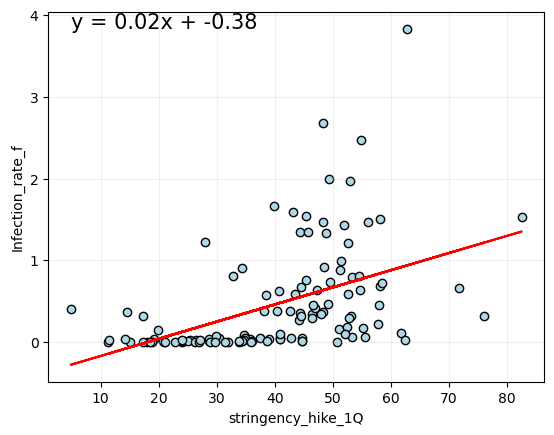

The correlation coefficient is : -0.08472236574356845


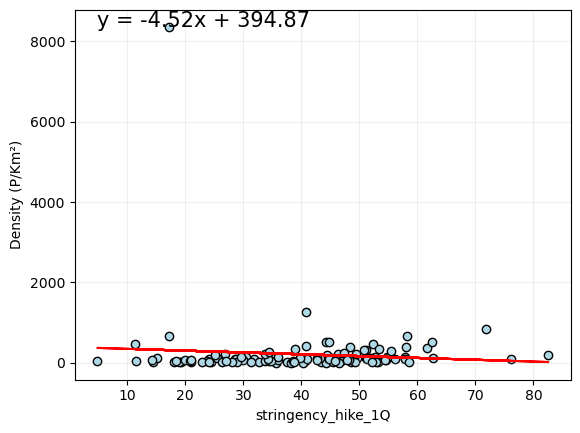

The correlation coefficient is : -0.012261109131183688


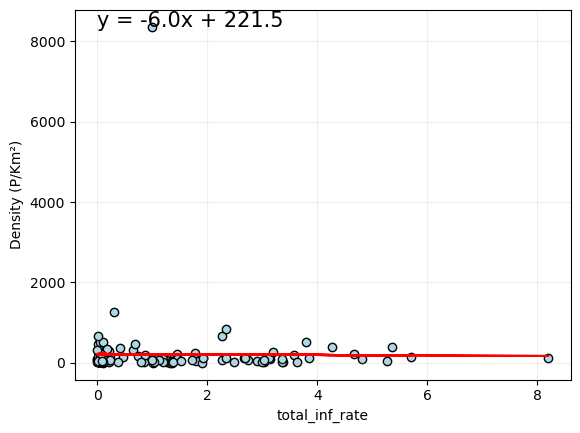

The correlation coefficient is : -0.044354872010859366


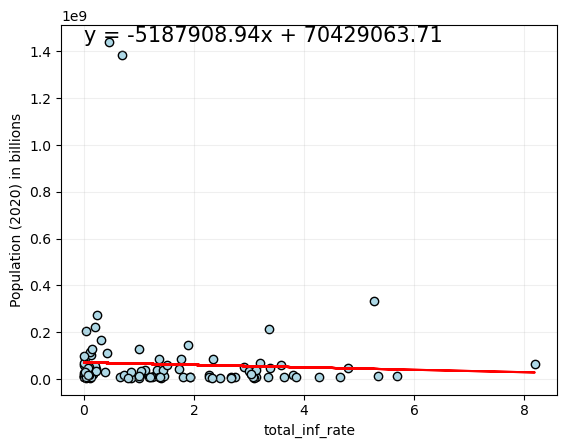

In [32]:
ln_rg_test()

In [87]:
sample.head(10)

standard_names ISO_2 ISO_3  Population (2020)        lat         lng  \
0   United States    US   USA          331341050  37.090240  -95.712891   
1           India    IN   IND         1382345085  20.593684   78.962880   
2          Brazil    BR   BRA          212821986 -14.235004  -51.925280   
3           China    CN   CHN         1440297825  35.861660  104.195397   
4          France    FR   FRA           65298930  46.227638    2.213749   
5          Russia    RU   RUS          145945524  61.524010  105.318756   
6           Spain    ES   ESP           46757980  40.463667   -3.749220   
7  United Kingdom    GB   GBR           67948282  55.378051   -3.435973   
8           Italy    IT   ITA           60446035  41.871940   12.567380   
9          Turkey    TR   TUR           84495243  38.963745   35.243322   

   Density (P/Km²)   Confirmed  stringency_index  Infection_rate_f  
0               36  17459296.0         56.045880            5.2692  
1              464   9462809.0         62.869497            0.6845  
2               25   7162978.0         56.761687            3.3657  
3              153   6665209.0         68.391841            0.4628  
4              119   5352449.0         55.223795            8.1966  
5                9   2764843.0         50.600998            1.8944  
6               94   2246032.0         55.975557            4.8034  
7              281   2173896.0         56.888553            3.1993  
8              206   2159937.0         58.364239            3.5734  
9              110   1982090.0         53.585087            2.3457

In [18]:
# Define function for calculating linear regression and scatter plot with linear regression plot
def linear_regression_sample(x,y,z, colx,coly):
#     print(f"The correlation coefficient of {country} is : {np.nan_to_num(round(st.pearsonr(x, y)[0],4))}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
#     print(f"The correlation coefficient of {country} is : {rvalue}")
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, c = "lightblue", edgecolor = "black")
    plt.plot(x,regress_values,"r-")
    plt.title(f"correlation value: {rvalue}")
    plt.ylabel(coly)
    plt.xlabel(colx)
    plt.grid(alpha = .2)
    for i, txt in enumerate(z):
        plt.annotate(txt, (x[i], y[i]))
    return line_eq

# Define a fuction for annotating
def plot_annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=8,color="black")


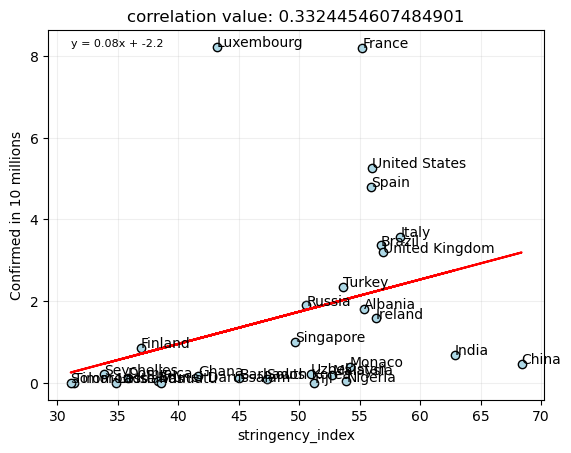

In [19]:
x = sample["stringency_index"]
y = sample["Infection_rate_f"]
z = sample["standard_names"]
colx = "stringency_index"
coly = "Confirmed in 10 millions"
a = x.min()
b = y.max()
line_eq = linear_regression_sample(x,y,z, colx, coly)
plot_annotate(line_eq,a,b)


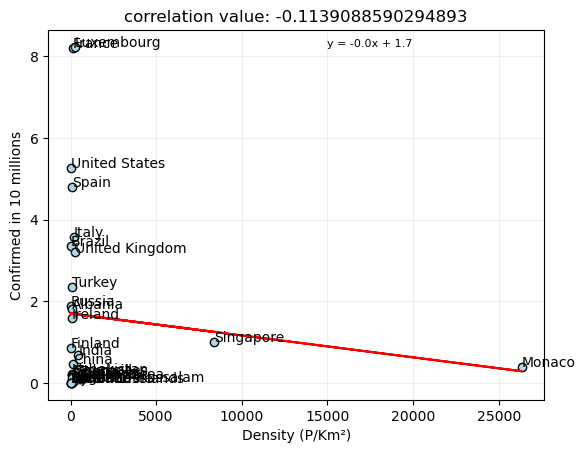

In [21]:
x = sample["Density (P/Km²)"]
y = sample["Infection_rate_f"]
z = sample["standard_names"]
colx = "Density (P/Km²)"
coly = "Confirmed in 10 millions"
a = 15000
b = y.max()
line_eq = linear_regression_sample(x,y,z,colx, coly)
plot_annotate(line_eq,a,b)

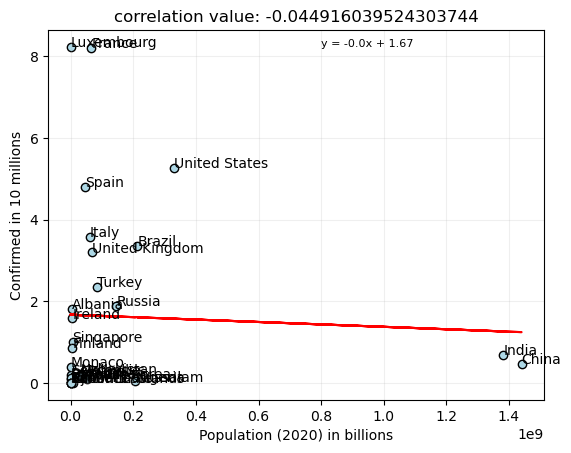

In [23]:
x = sample["Population (2020)"]
y = sample["Infection_rate_f"]
z = sample["standard_names"]
colx = "Population (2020) in billions"
coly = "Confirmed in 10 millions"
a = 800000000
b = y.max()
line_eq = linear_regression_sample(x,y,z, colx, coly)
plot_annotate(line_eq,a,b)